# Importing Neccessary Libraries

In [1]:
!pip install matplotlib seaborn pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings(action = 'ignore')

# Importing dataset and loading onto dataframes

In [2]:
# Load the CSV files into a DataFrame
file_path = 'Economy_Productivity_SD_India.csv'
data = pd.read_csv(file_path)

# Sanity Check of Data

In [3]:
data.shape

(180, 9)

In [4]:
# To get first 5 rows
data.head()

City  Year  R&D Expenditure (% of GDP)  \
0  Ahmedabad  2019                        1.06   
1  Ahmedabad  2020                        1.93   
2  Ahmedabad  2021                        1.60   
3  Ahmedabad  2022                        1.40   
4  Ahmedabad  2023                        0.73   

   Patents per 100,000 Inhabitants  Unemployment Rate (%)  \
0                              3.4                    5.6   
1                              2.1                    6.6   
2                              6.6                    5.8   
3                              6.3                    6.2   
4                              2.9                    7.8   

   Youth Unemployment Rate (%)  SME Employment (%)  \
0                         11.8                38.5   
1                         10.4                19.5   
2                          8.9                16.7   
3                         10.7                33.5   
4                         10.5                29.4   

   Tourism Sector Employment (%)  ICT Sector Employment (%)  
0                            5.2                       20.7  
1                            4.2                        6.8  
2                            5.1                       13.4  
3                            7.5                       22.6  
4                            6.5                       23.9

In [5]:
# To get info about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   City                             180 non-null    object 
 1   Year                             180 non-null    int64  
 2   R&D Expenditure (% of GDP)       180 non-null    float64
 3   Patents per 100,000 Inhabitants  180 non-null    float64
 4   Unemployment Rate (%)            180 non-null    float64
 5   Youth Unemployment Rate (%)      180 non-null    float64
 6   SME Employment (%)               180 non-null    float64
 7   Tourism Sector Employment (%)    180 non-null    float64
 8   ICT Sector Employment (%)        180 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 12.8+ KB


In [6]:
# Renaming the Column City
data.rename(columns = {"ï»¿City":"City"}, inplace = True)

In [7]:
# Checking for duplicates
data.duplicated().sum()

0

# Exploratory Data Analysis

In [8]:
# descriptive statistics
data.describe(include = 'all').T

count unique        top freq       mean  \
City                               180     30  Ahmedabad    6        NaN   
Year                             180.0    NaN        NaN  NaN     2021.5   
R&D Expenditure (% of GDP)       180.0    NaN        NaN  NaN   1.208167   
Patents per 100,000 Inhabitants  180.0    NaN        NaN  NaN   4.296667   
Unemployment Rate (%)            180.0    NaN        NaN  NaN       6.16   
Youth Unemployment Rate (%)      180.0    NaN        NaN  NaN   9.813333   
SME Employment (%)               180.0    NaN        NaN  NaN  27.197222   
Tourism Sector Employment (%)    180.0    NaN        NaN  NaN      7.005   
ICT Sector Employment (%)        180.0    NaN        NaN  NaN  15.628889   

                                      std     min     25%     50%     75%  \
City                                  NaN     NaN     NaN     NaN     NaN   
Year                             1.712589  2019.0  2020.0  2021.5  2023.0   
R&D Expenditure (% of GDP)       0.440471    0.51  0.8275   1.195    1.59   
Patents per 100,000 Inhabitants  1.592893     1.5   2.975     4.5   5.525   
Unemployment Rate (%)            1.260602     4.0     5.1     6.2     7.3   
Youth Unemployment Rate (%)      1.106325     8.1     8.8     9.7    10.7   
SME Employment (%)                 7.2092    15.1  20.425   27.15  33.425   
Tourism Sector Employment (%)    1.769268     4.1     5.5     7.0     8.6   
ICT Sector Employment (%)        5.963497     5.1   10.05    16.6   20.75   

                                    max  
City                                NaN  
Year                             2024.0  
R&D Expenditure (% of GDP)         1.98  
Patents per 100,000 Inhabitants     6.9  
Unemployment Rate (%)               8.0  
Youth Unemployment Rate (%)        12.0  
SME Employment (%)                 39.9  
Tourism Sector Employment (%)      10.0  
ICT Sector Employment (%)          24.9

## City Analysis

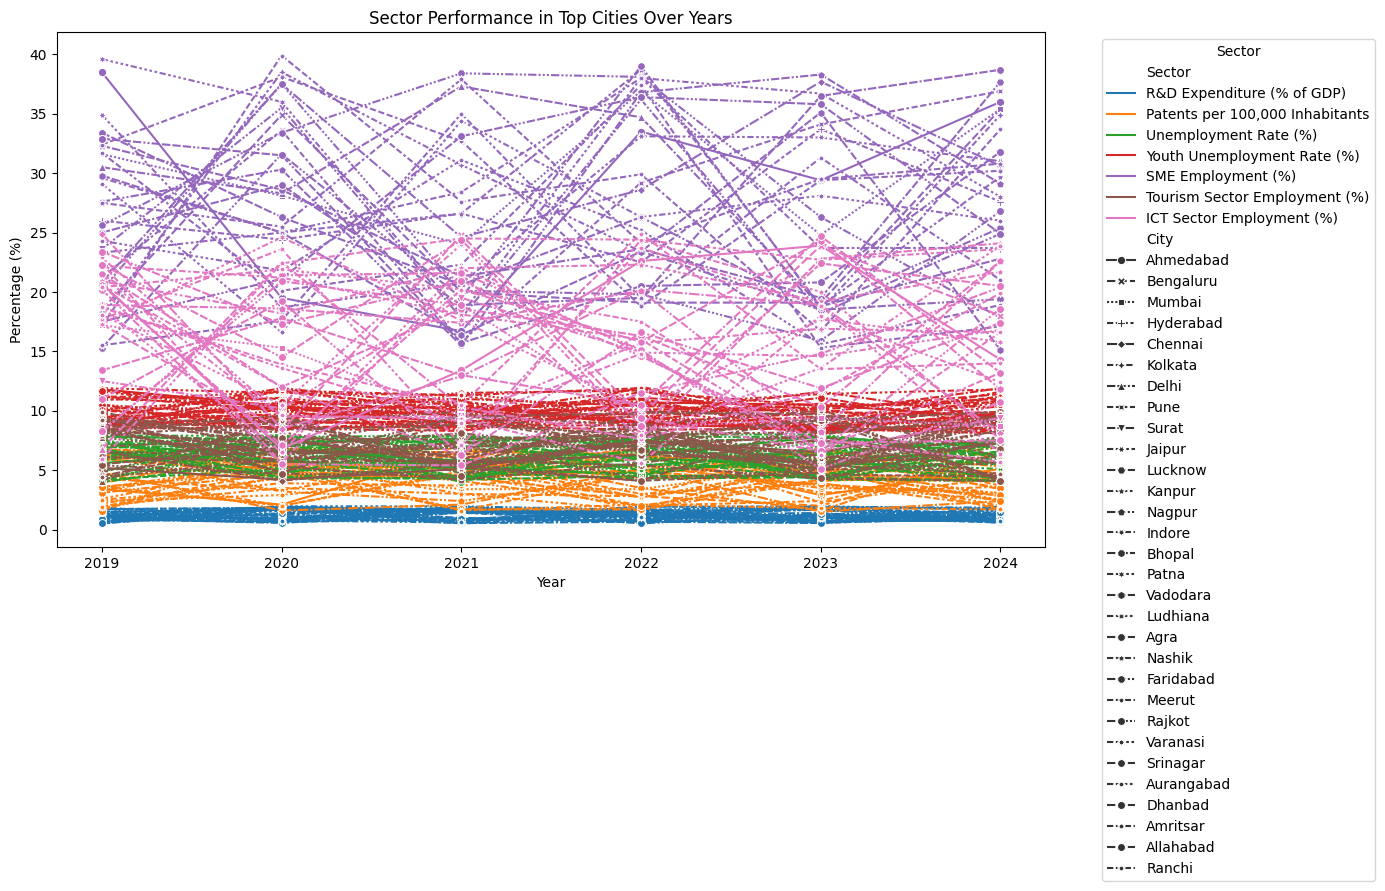

In [9]:
# Melting the dataframe to long format
data_melted = data.melt(id_vars=['Year', 'City'], var_name='Sector', value_name='Percentage')

# Set up the matplotlib figure
plt.figure(figsize=(14, 8))

# Create a line plot
sns.lineplot(data=data_melted, x='Year', y='Percentage', hue='Sector', style='City', markers=True)

# Set titles and labels
plt.title('Sector Performance in Top Cities Over Years')
plt.xlabel('Year')
plt.ylabel('Percentage (%)')
plt.legend(title='Sector', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout
plt.tight_layout()
plt.show()

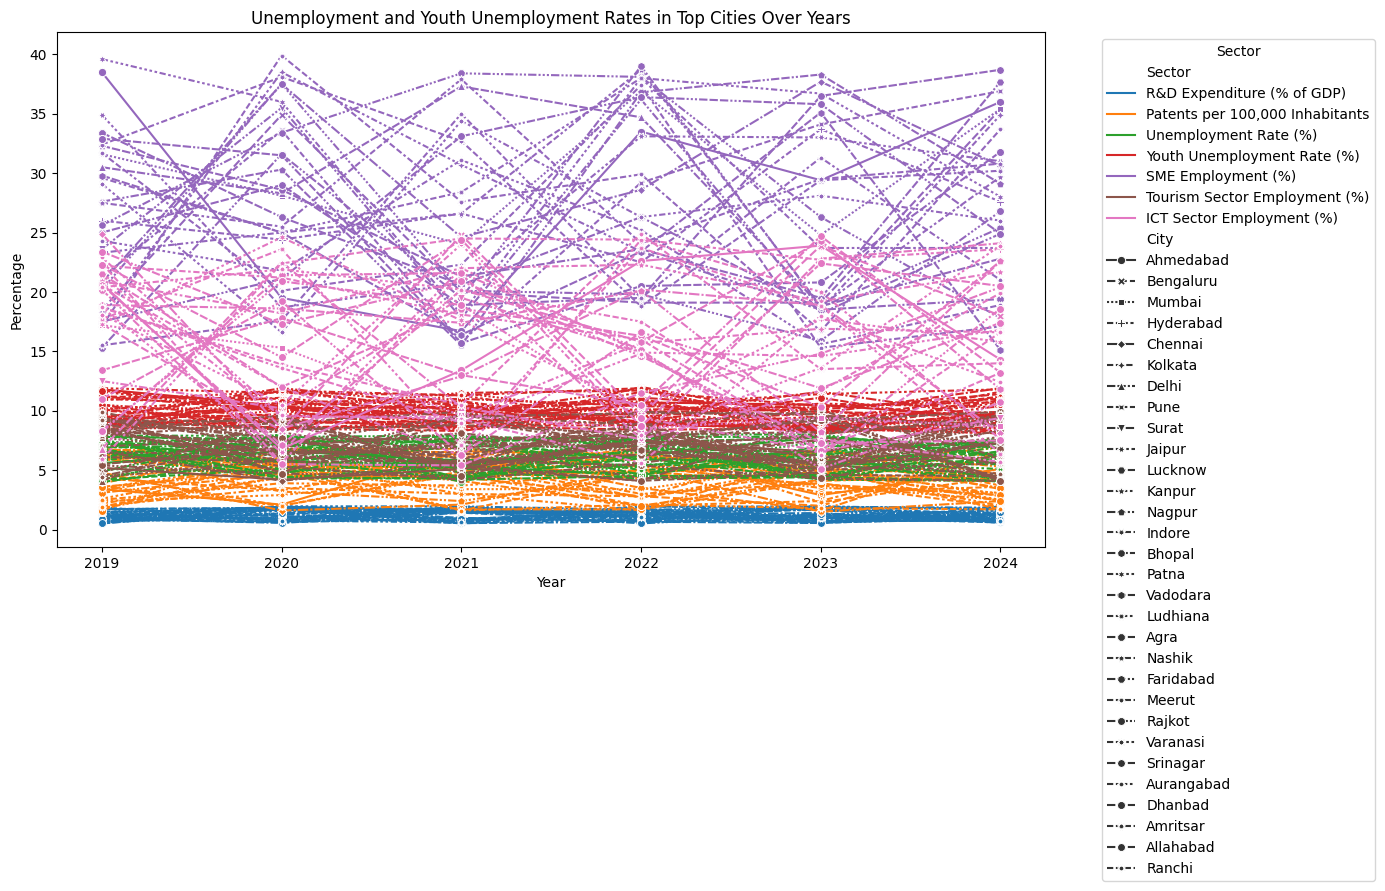

In [10]:
# Melting the dataframe to long format
data_melted = data.melt(id_vars=['Year', 'City'], var_name='Sector', value_name='Percentage')

# Set up the matplotlib figure
plt.figure(figsize=(14, 8))

# Create a line plot
sns.lineplot(data=data_melted, x='Year', y='Percentage', hue='Sector', style='City', markers=True)

# Set titles and labels
plt.title('Unemployment and Youth Unemployment Rates in Top Cities Over Years')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.legend(title='Sector', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout
plt.tight_layout()
plt.show()

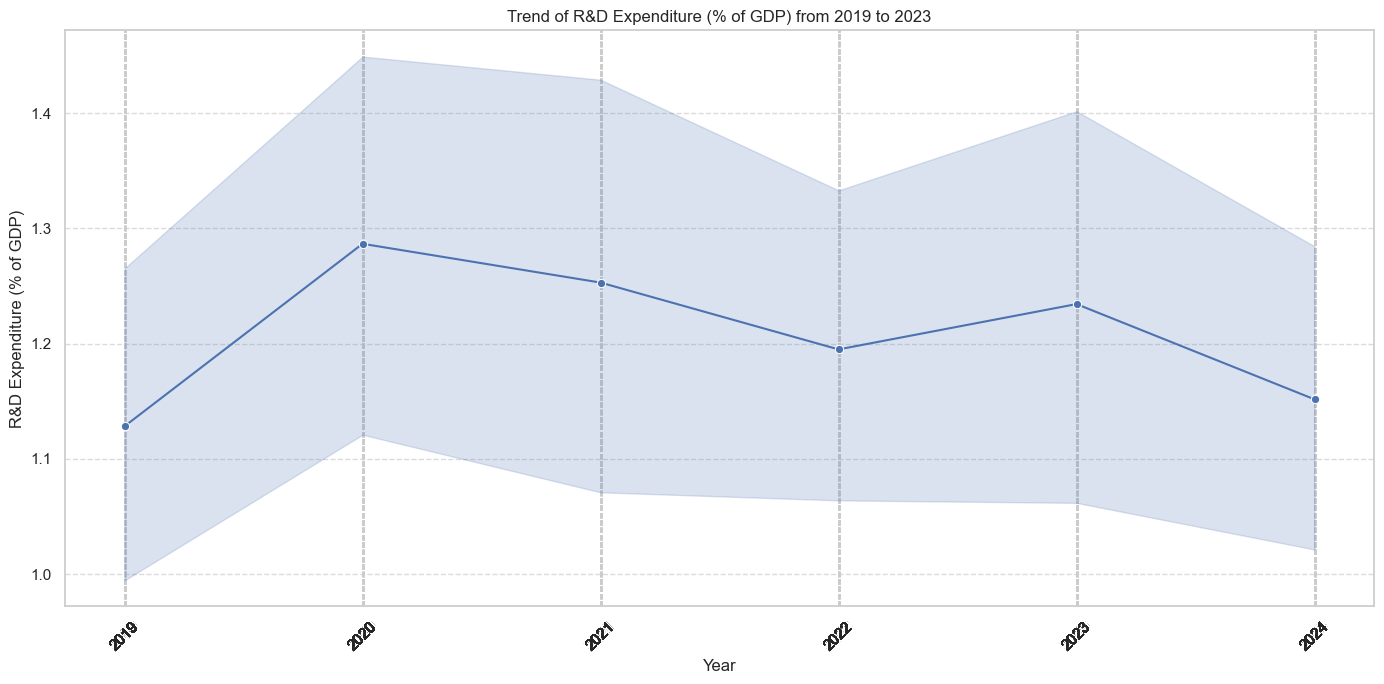

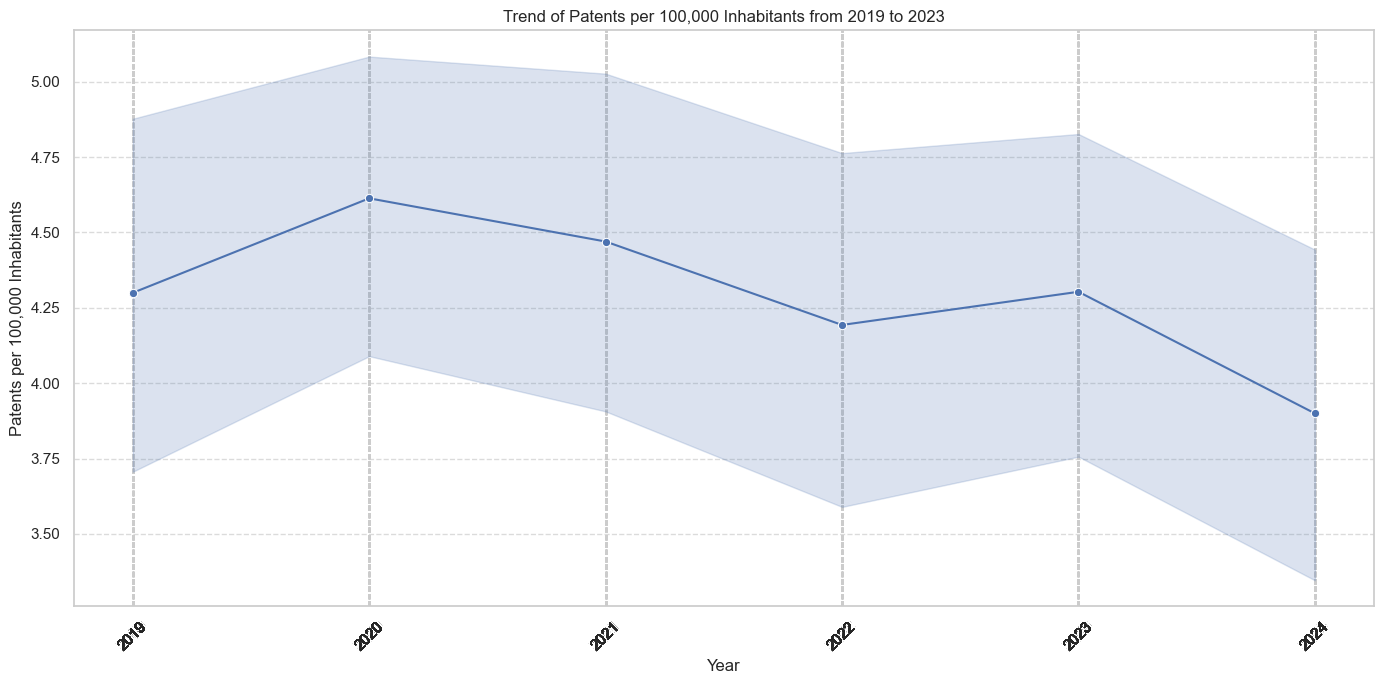

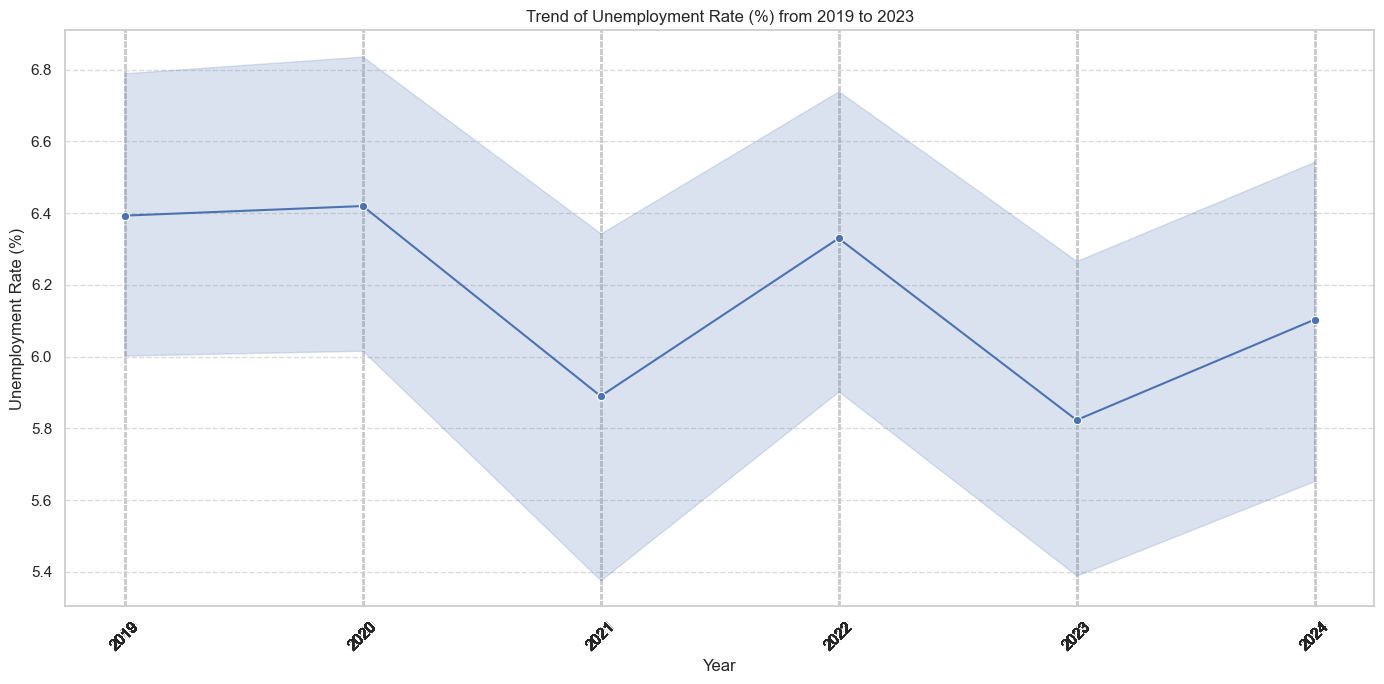

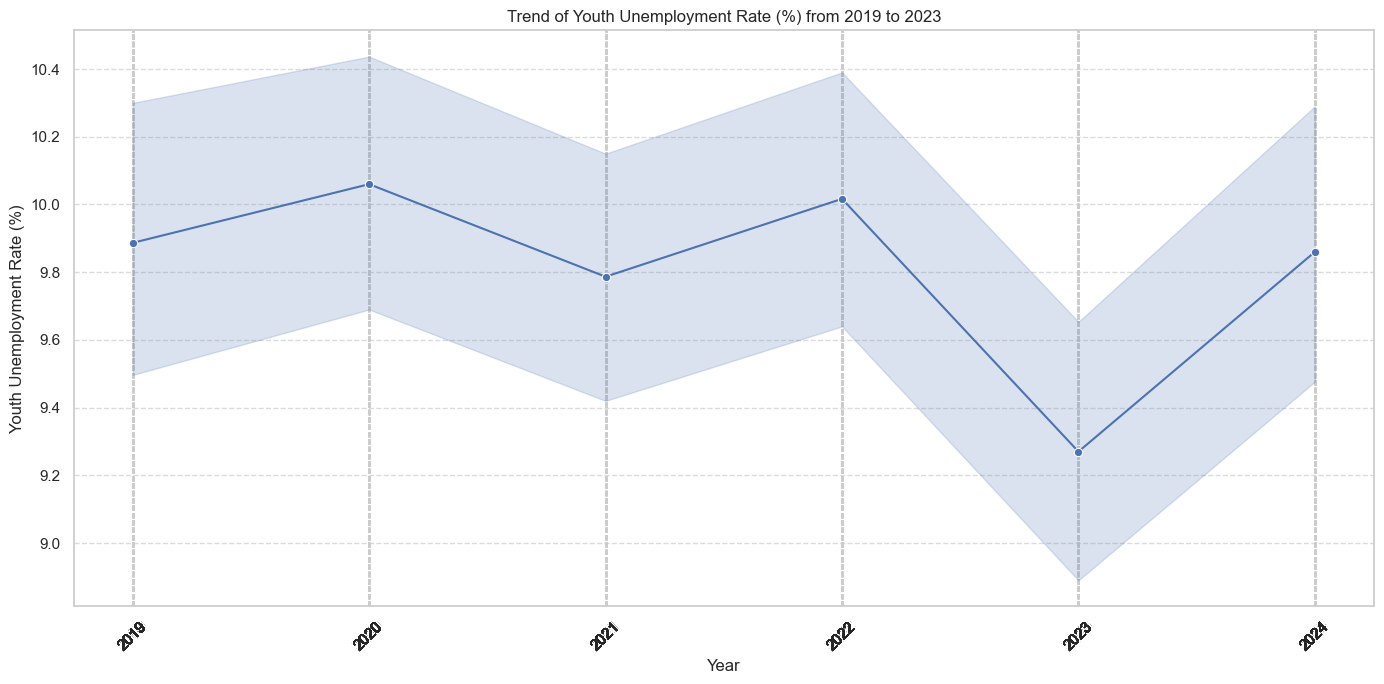

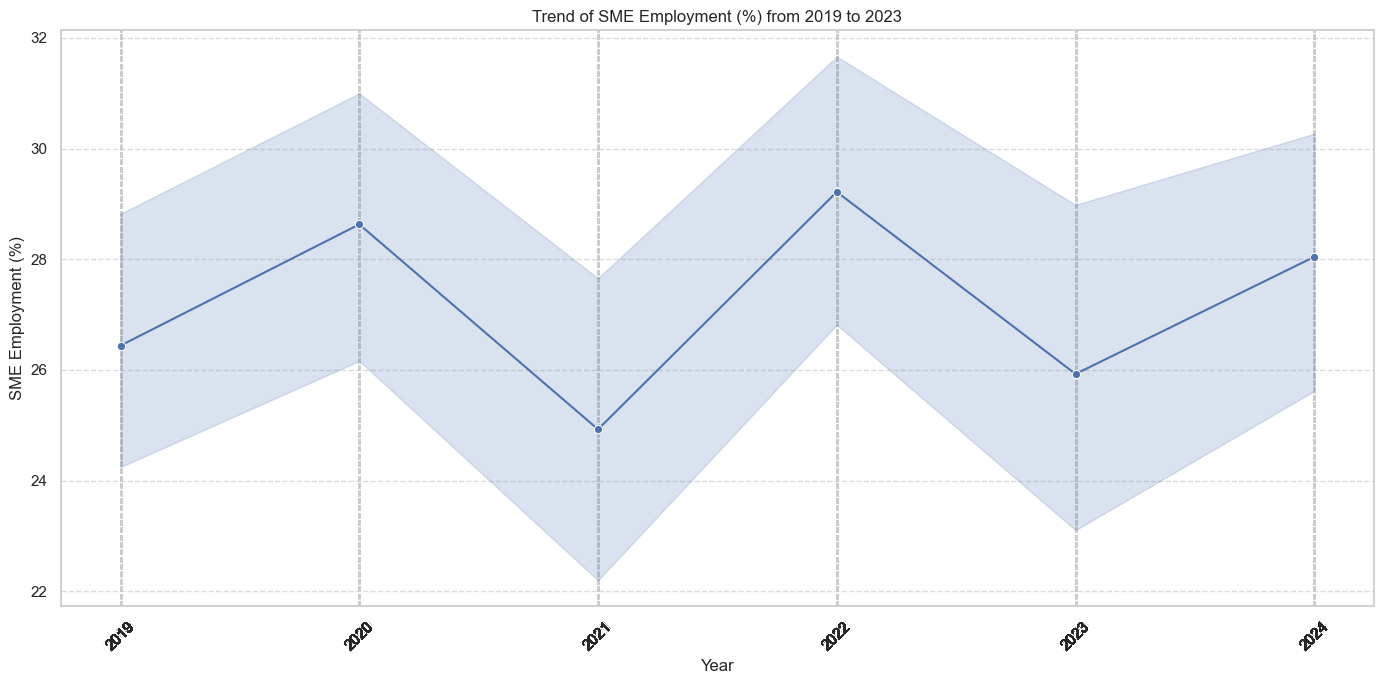

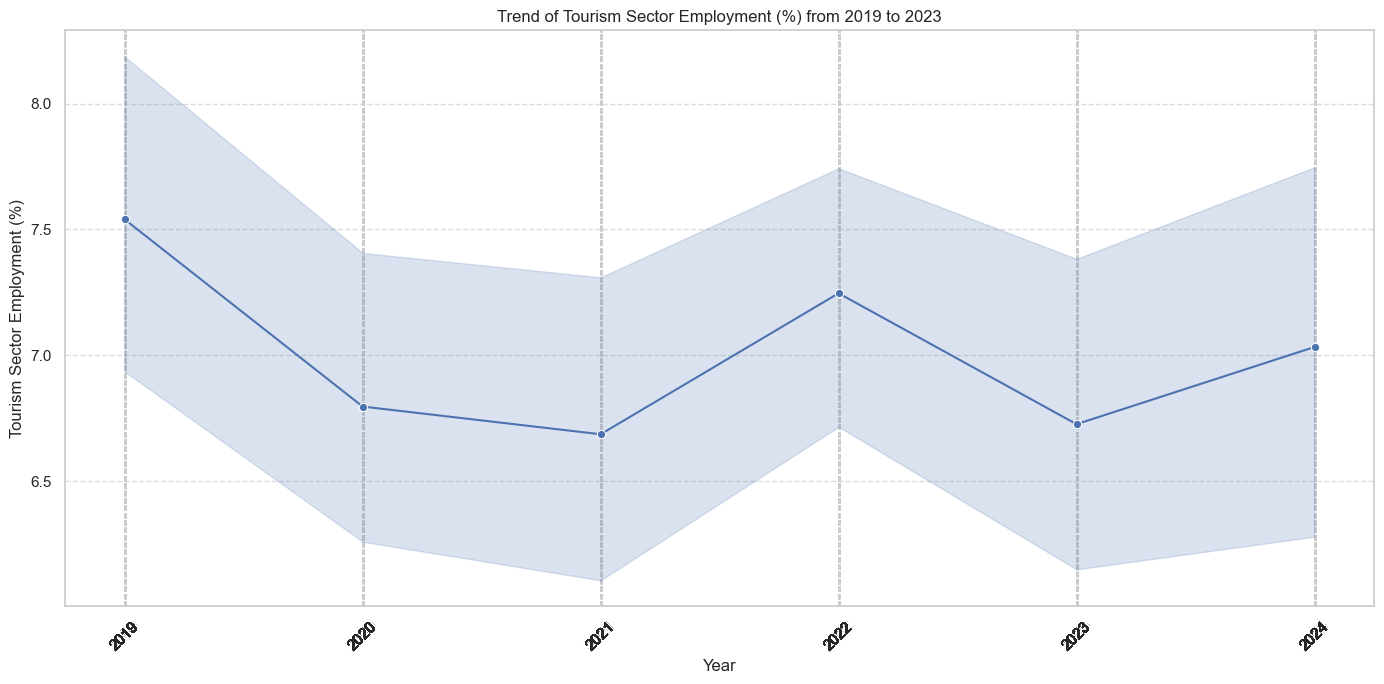

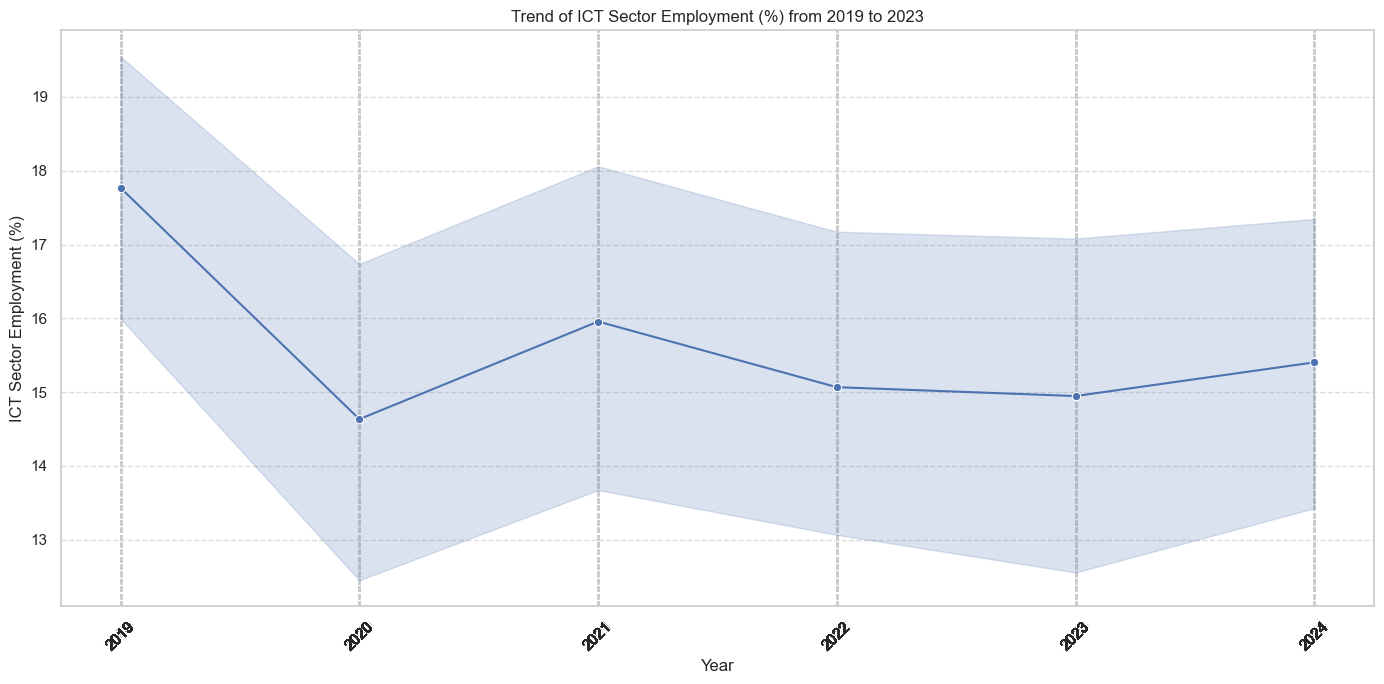

In [11]:
# Set the visual style for the plots
sns.set(style="whitegrid")

def visualize_data_trends(data_frame):
    """
    Plots trends for each variable over the years from the provided dataframe.
    
    Args:
    data_frame (pd.DataFrame): DataFrame containing the data with 'Year' column and other variables.
    """
    years = data_frame['Year']
    
    # Loop through each column (except 'Year') to plot its trend over time
    for column in data_frame.columns[2:]:
        plt.figure(figsize=(14, 7))
        sns.lineplot(data=data_frame, x='Year', y=column, marker='o', linestyle='-')
        plt.title(f'Trend of {column} from 2019 to 2023')
        plt.xlabel('Year')
        plt.ylabel(column)
        plt.xticks(ticks=years, labels=[str(year) for year in years], rotation=45)
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()

# Call the function to visualize the data trends
visualize_data_trends(data)


# To visualize the Pairplot of data

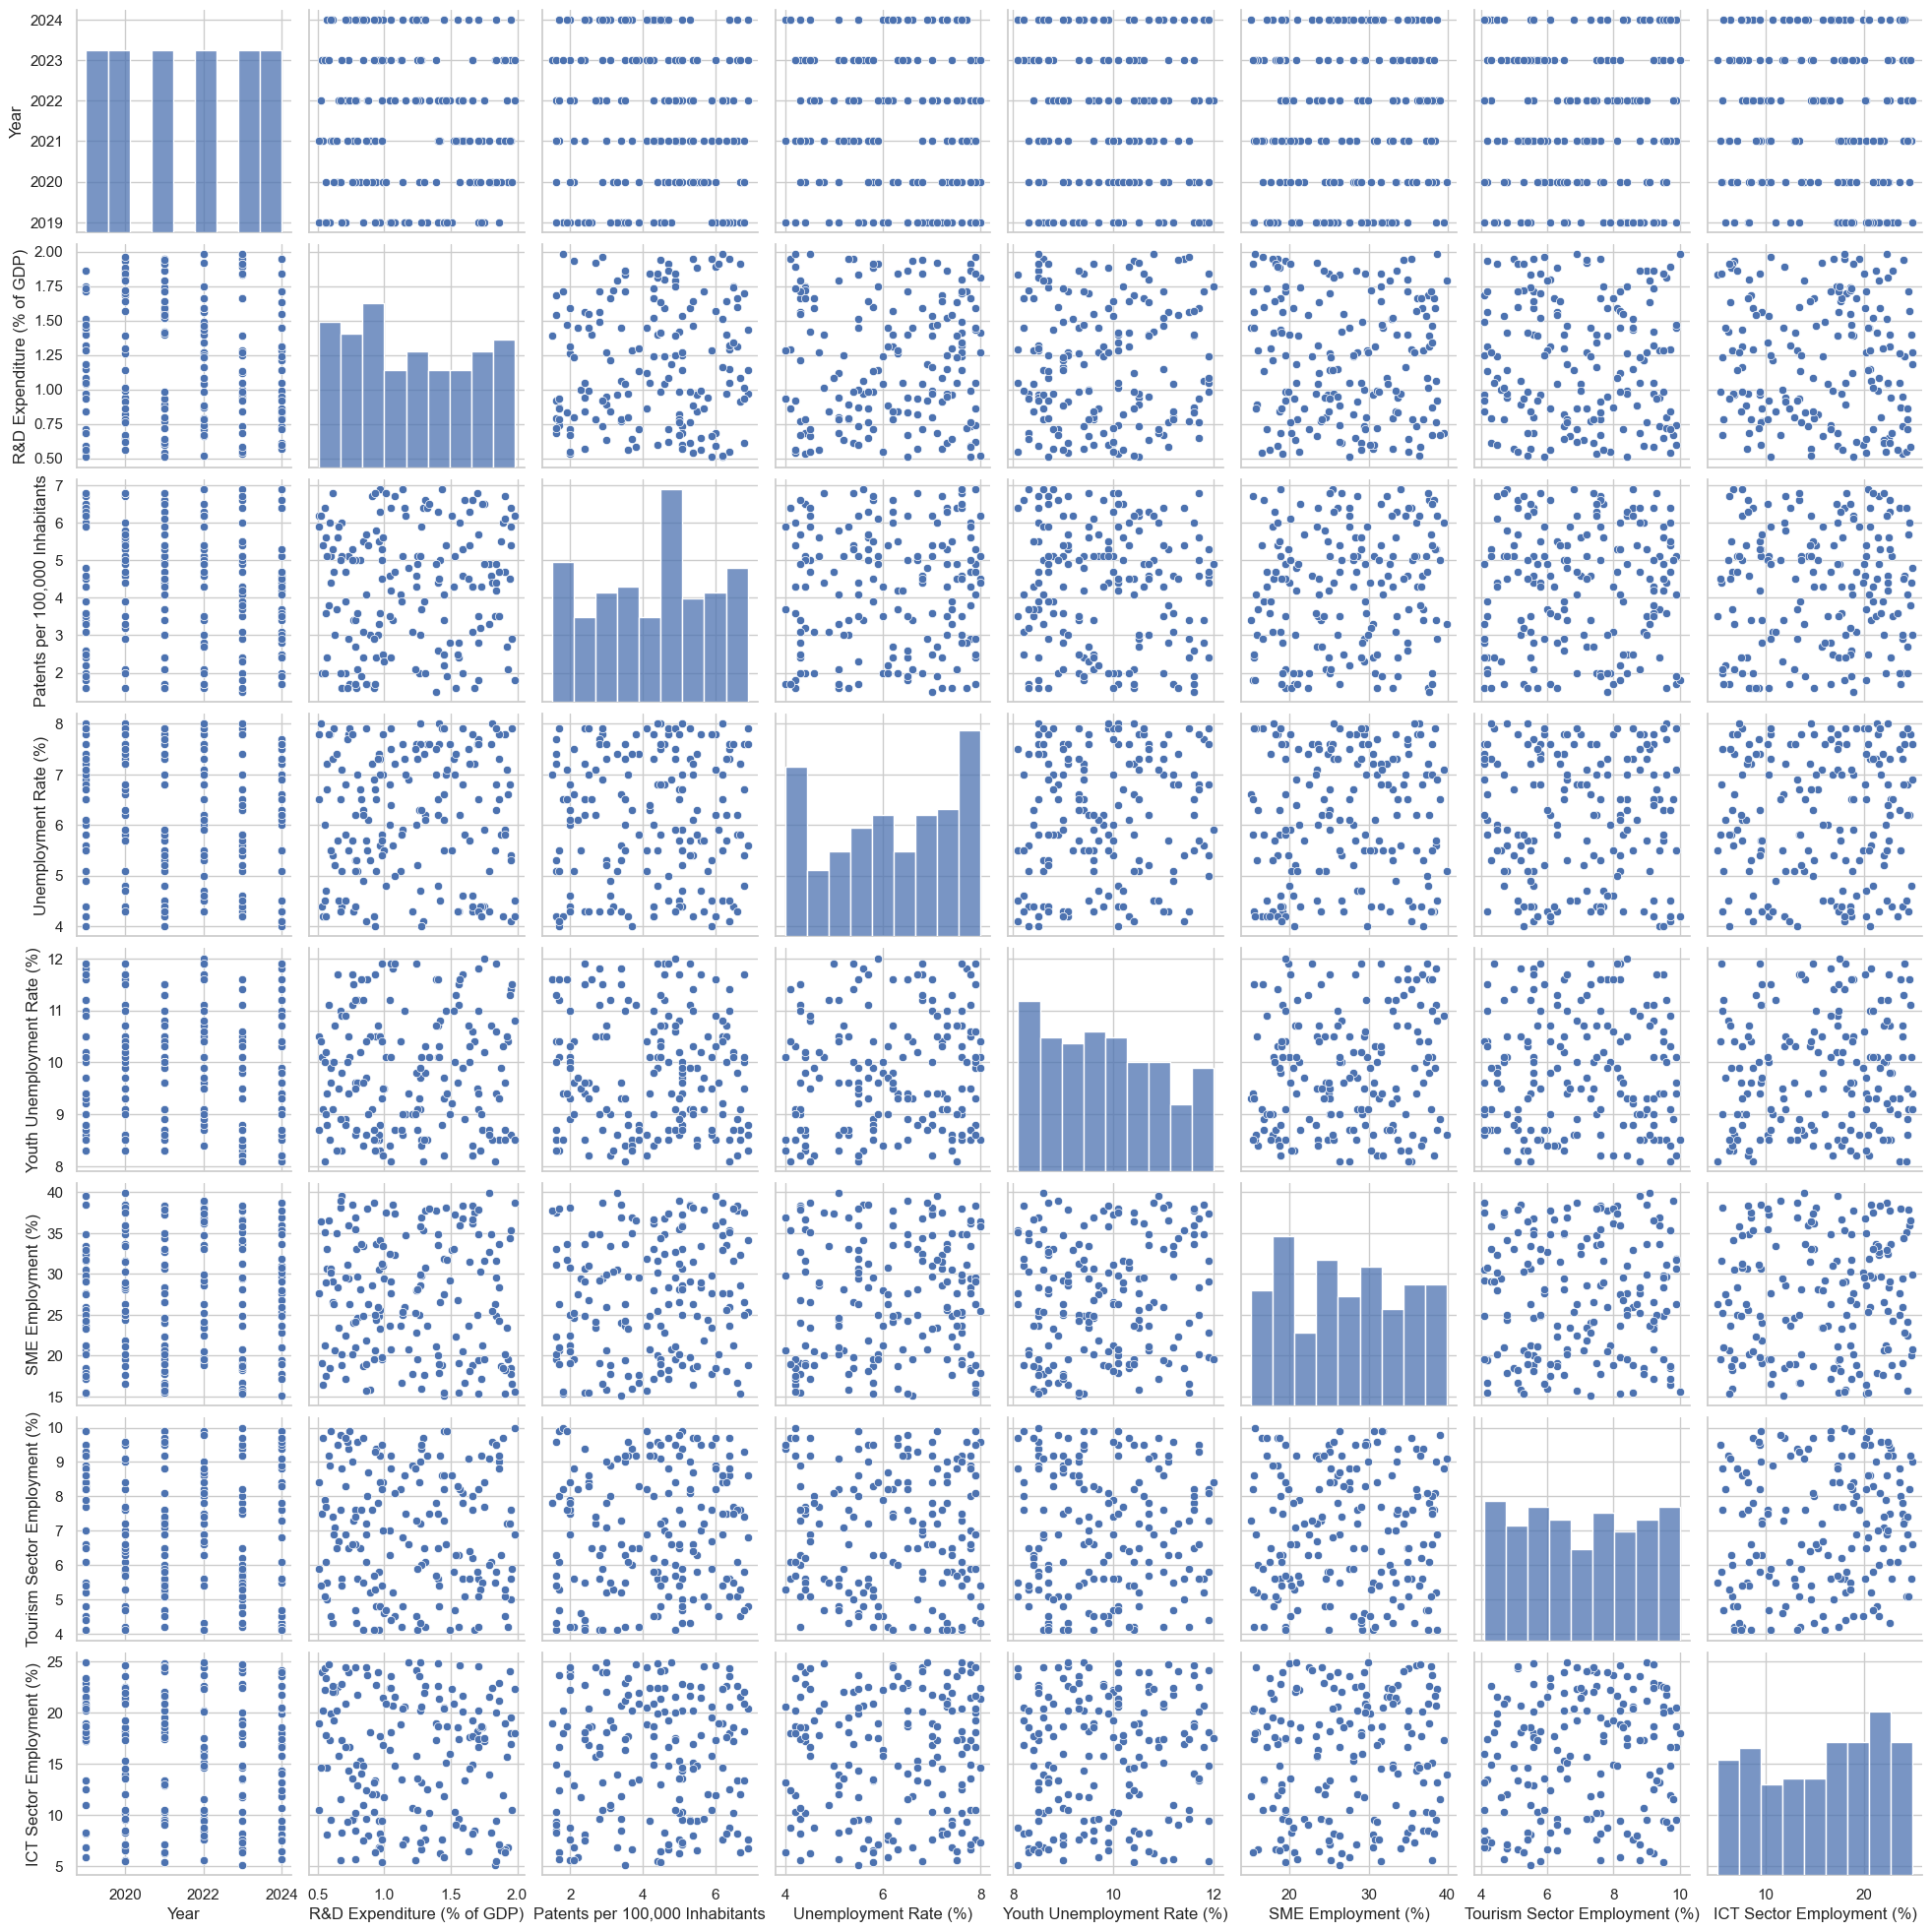

In [12]:
sns.pairplot(data)
plt.show()

# Histogram to understand the data

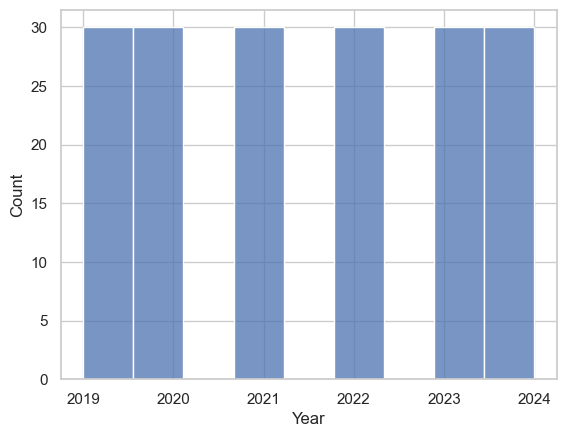

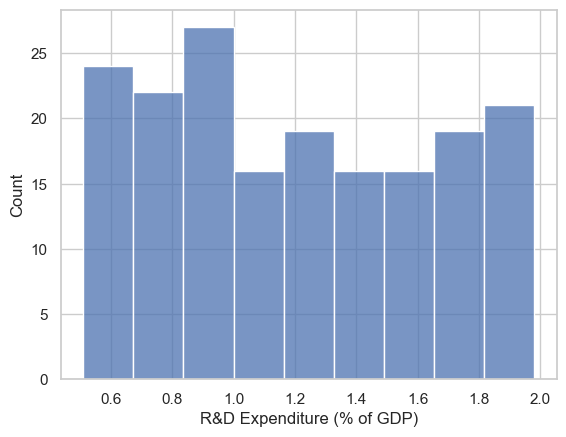

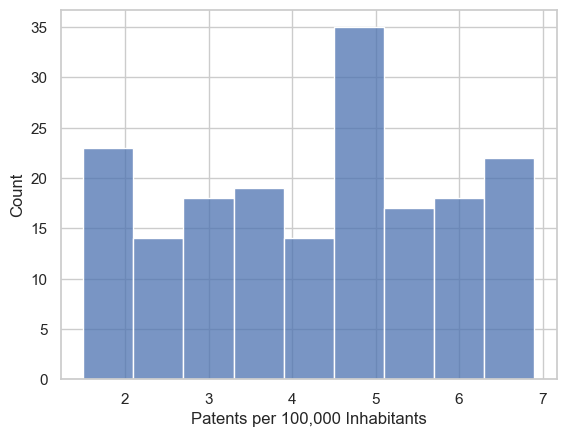

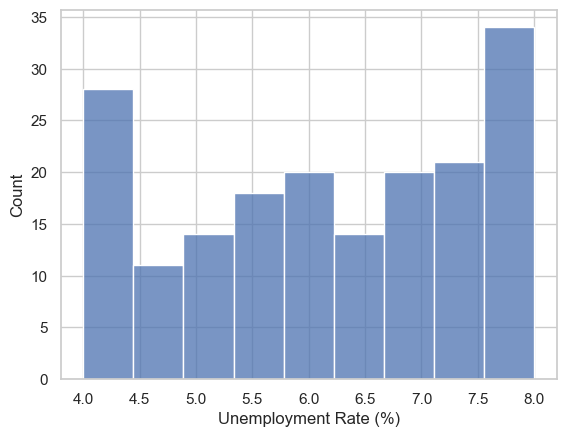

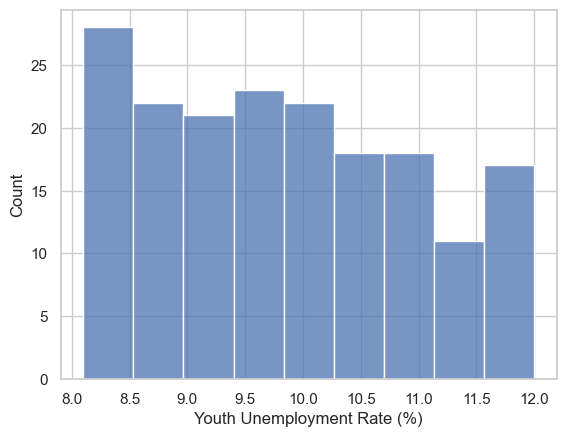

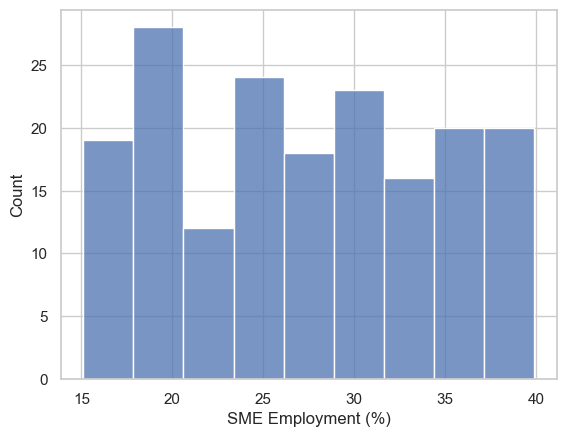

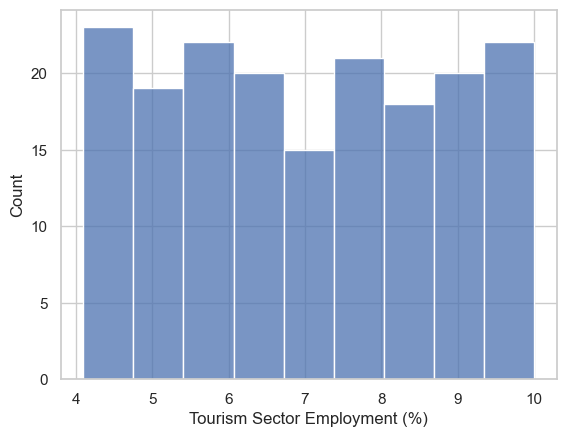

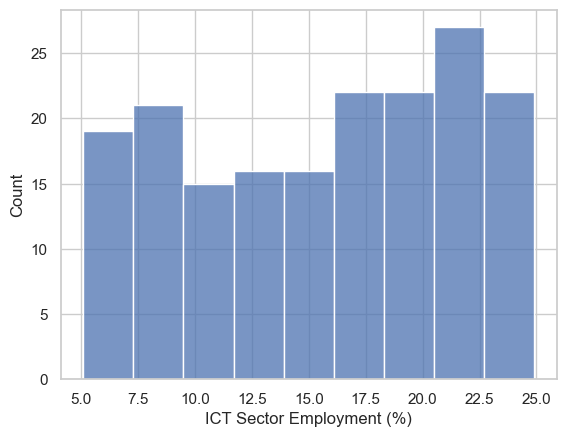

In [13]:
for i in data.select_dtypes(include = "number").columns:
    sns.histplot(data = data, x = i)
    plt.show()

# Boxplot to identify Outliers

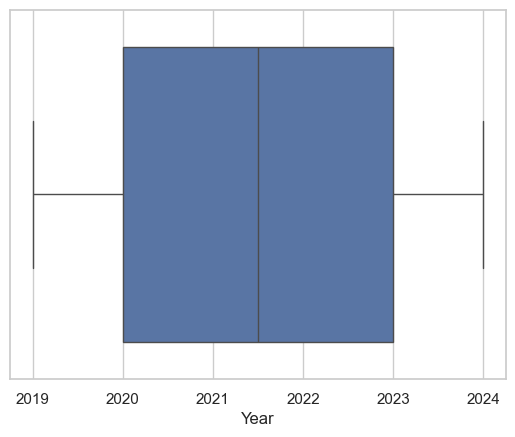

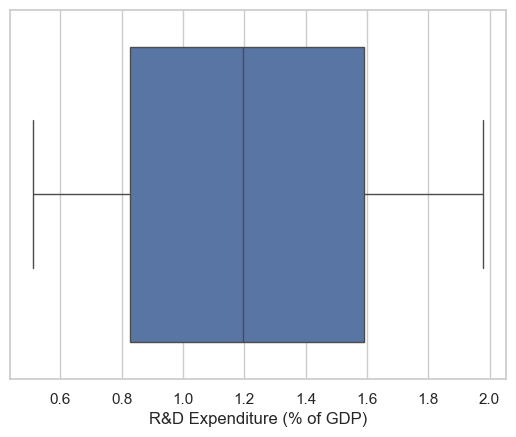

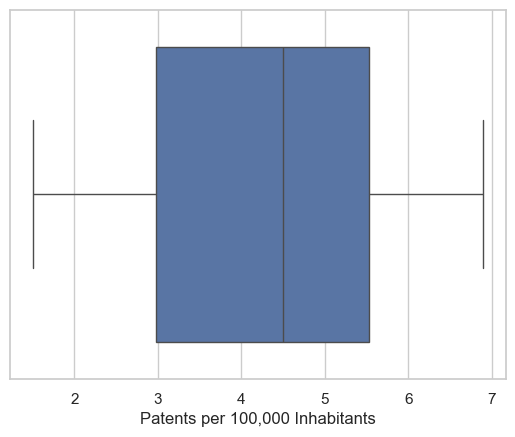

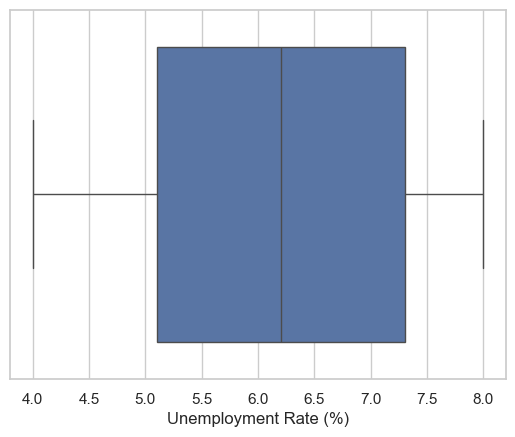

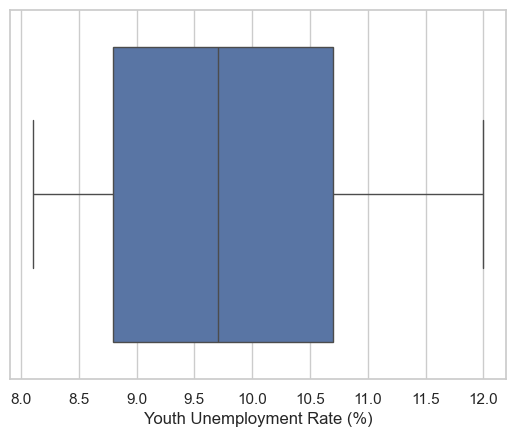

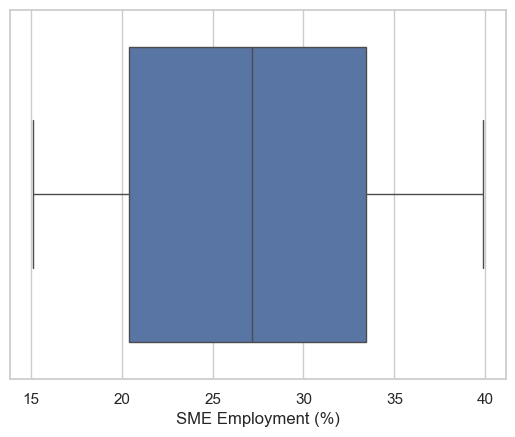

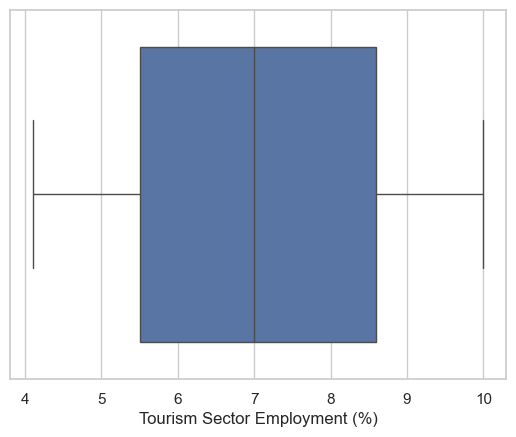

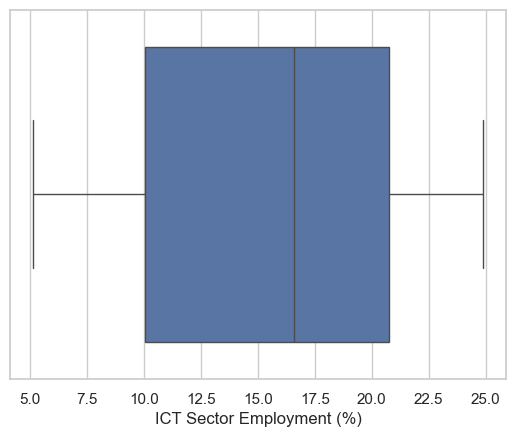

In [14]:
for i in data.select_dtypes(include = "number").columns:
    sns.boxplot(data = data, x = i)
    plt.show()

# Scatterplot to understand the relationship

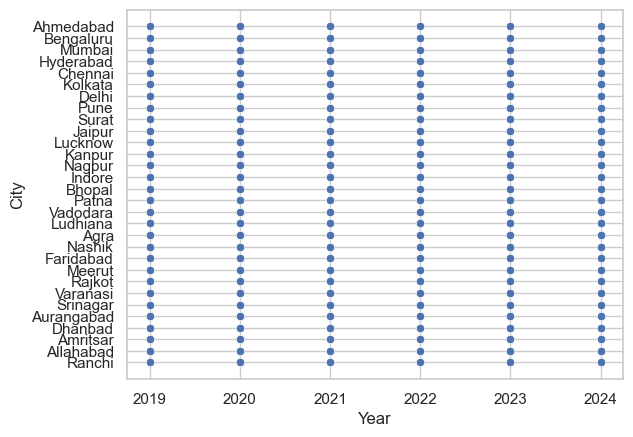

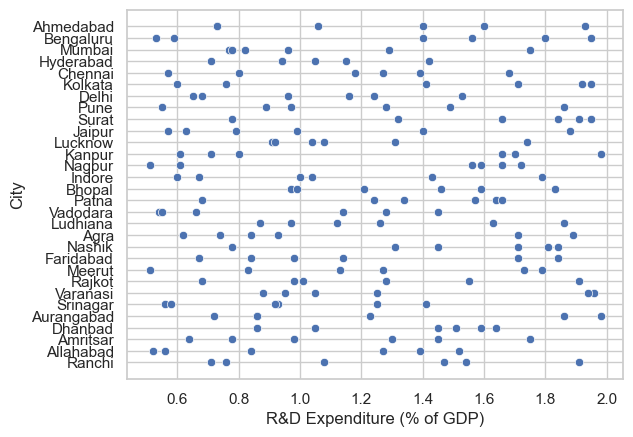

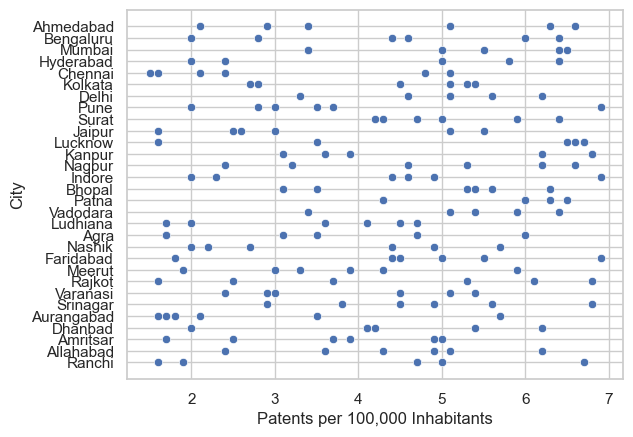

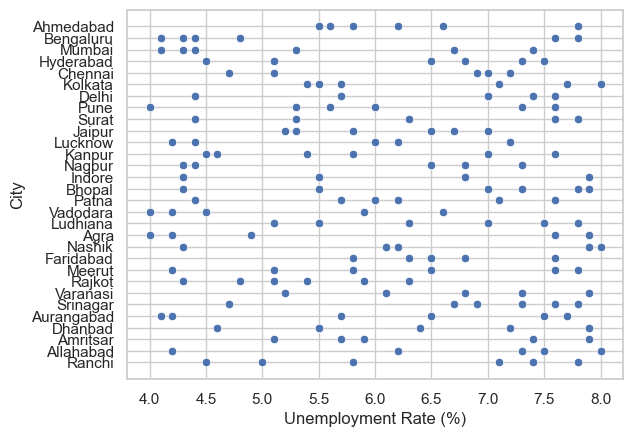

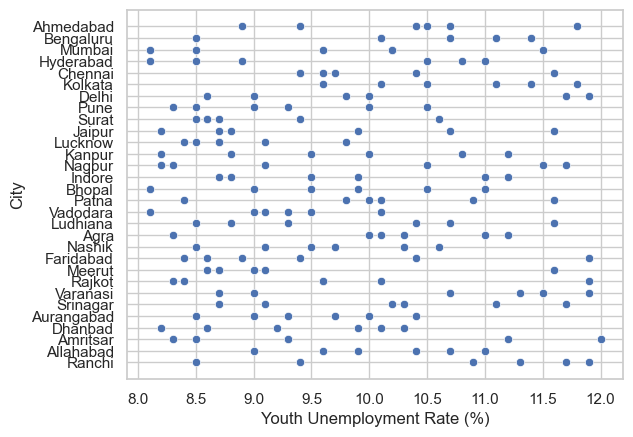

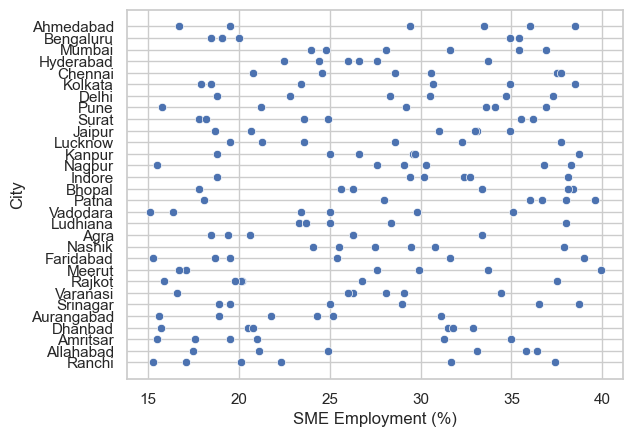

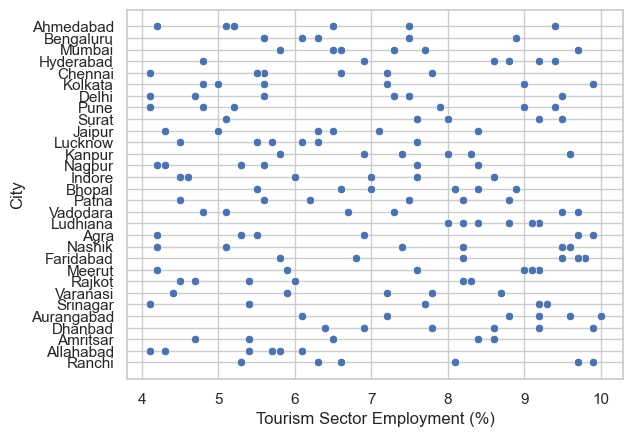

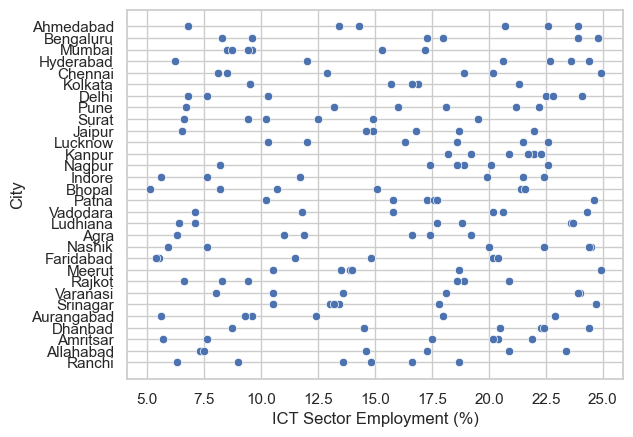

In [15]:
for i in data.select_dtypes(include = "number").columns:
    sns.scatterplot(data = data, x = i, y = 'City')
    plt.show()

# Count of cities

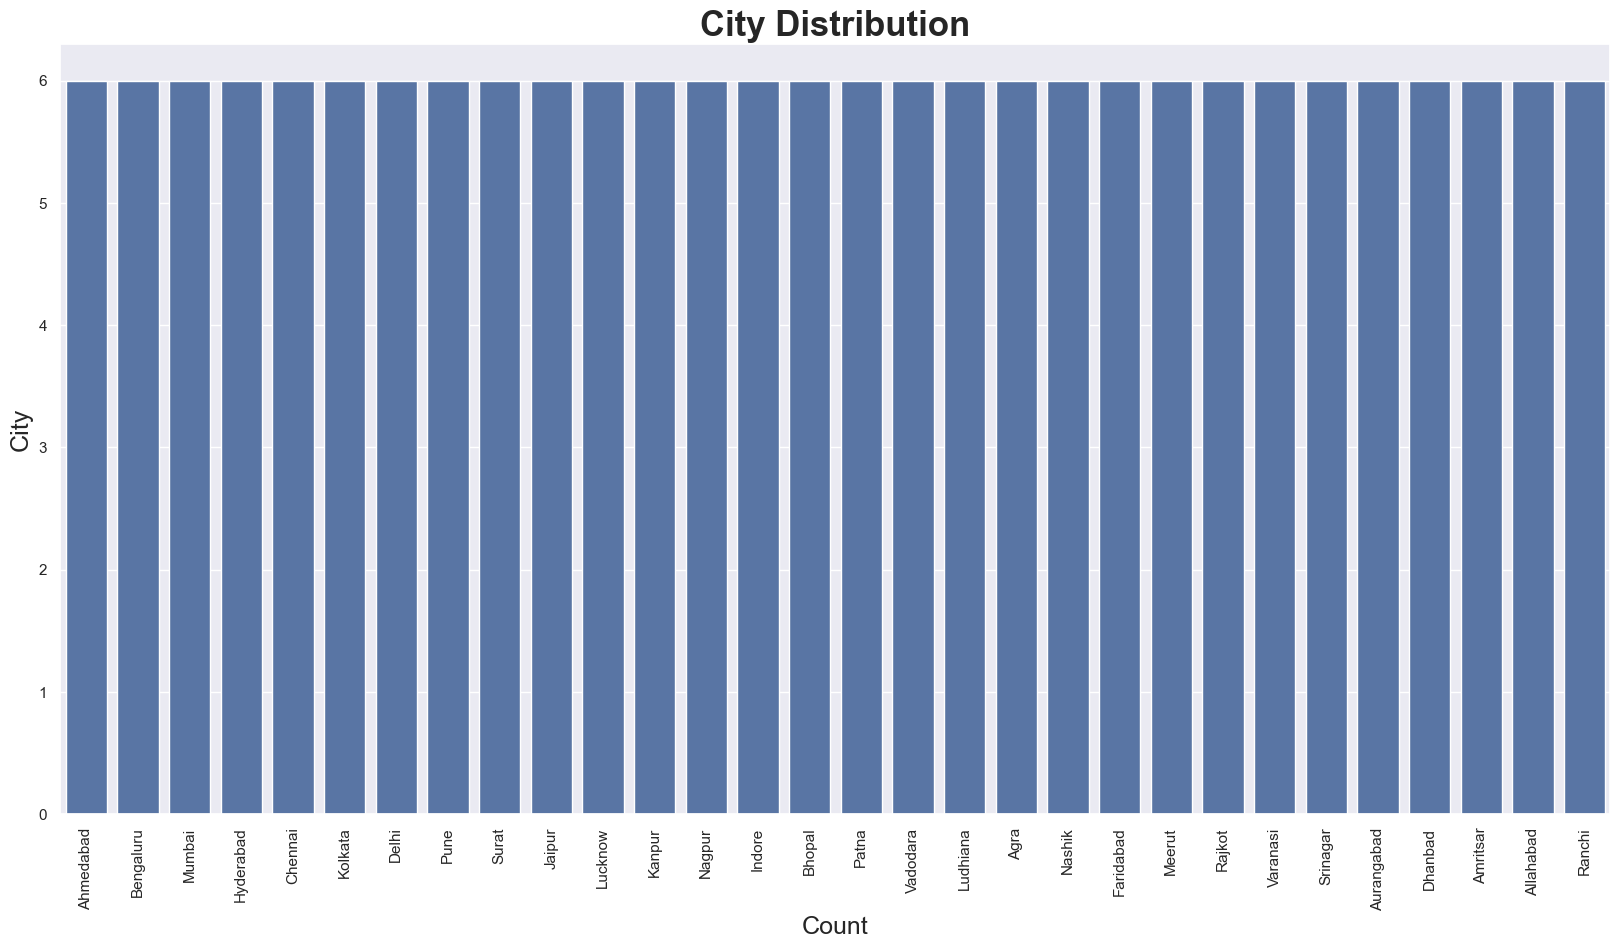

In [16]:
sns.set(rc = {'figure.figsize':(20,10)})
sns.countplot(data = data, x = 'City',)
plt.title("City Distribution", fontsize = 25, fontweight='bold')
plt.xlabel("Count", fontsize = 18)
plt.ylabel("City", fontsize = 18)
plt.xticks(rotation = 90)
plt.show()

#  R&D Expenditure over the years

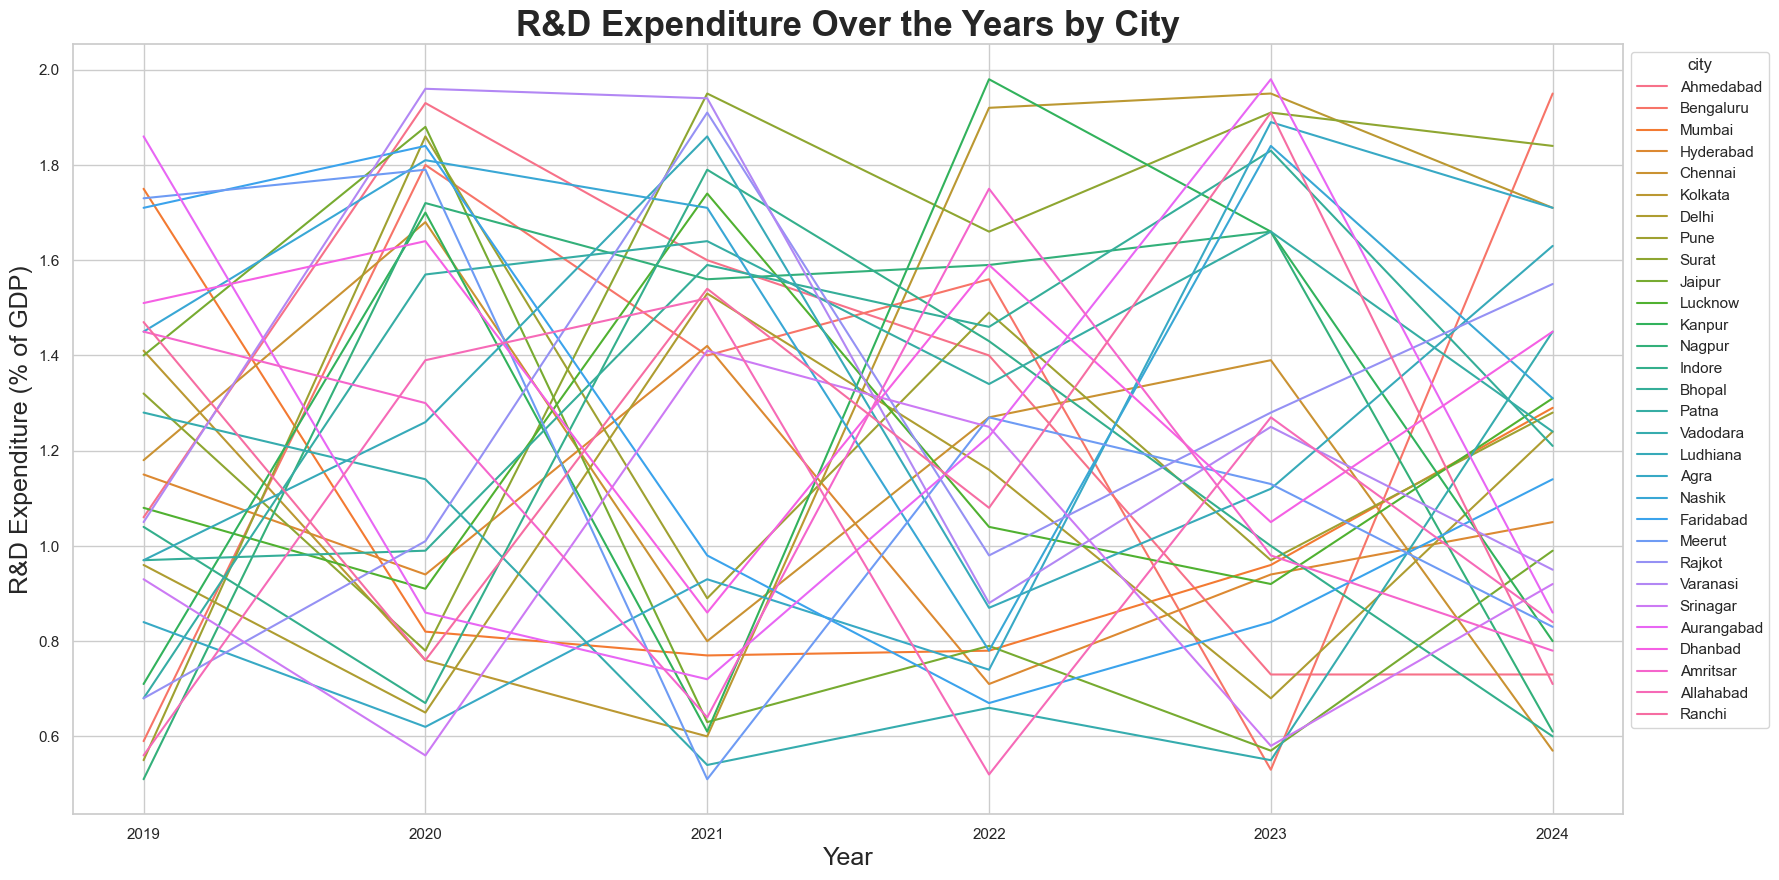

In [17]:
plt.figure(figsize=(20, 10))
sns.set_theme(style="whitegrid")
palette = sns.color_palette("muted", as_cmap=True)
sns.lineplot(data = data, x = 'Year', y = 'R&D Expenditure (% of GDP)', hue = 'City')
plt.title('R&D Expenditure Over the Years by City',fontweight='bold', fontsize = 25)
plt.xlabel('Year', fontsize = 18)
plt.ylabel('R&D Expenditure (% of GDP)', fontsize = 18)
plt.legend(title = 'city', bbox_to_anchor = (1,1), loc = 'upper left')
plt.show()


# Comparing Unemployment Rate across Cities

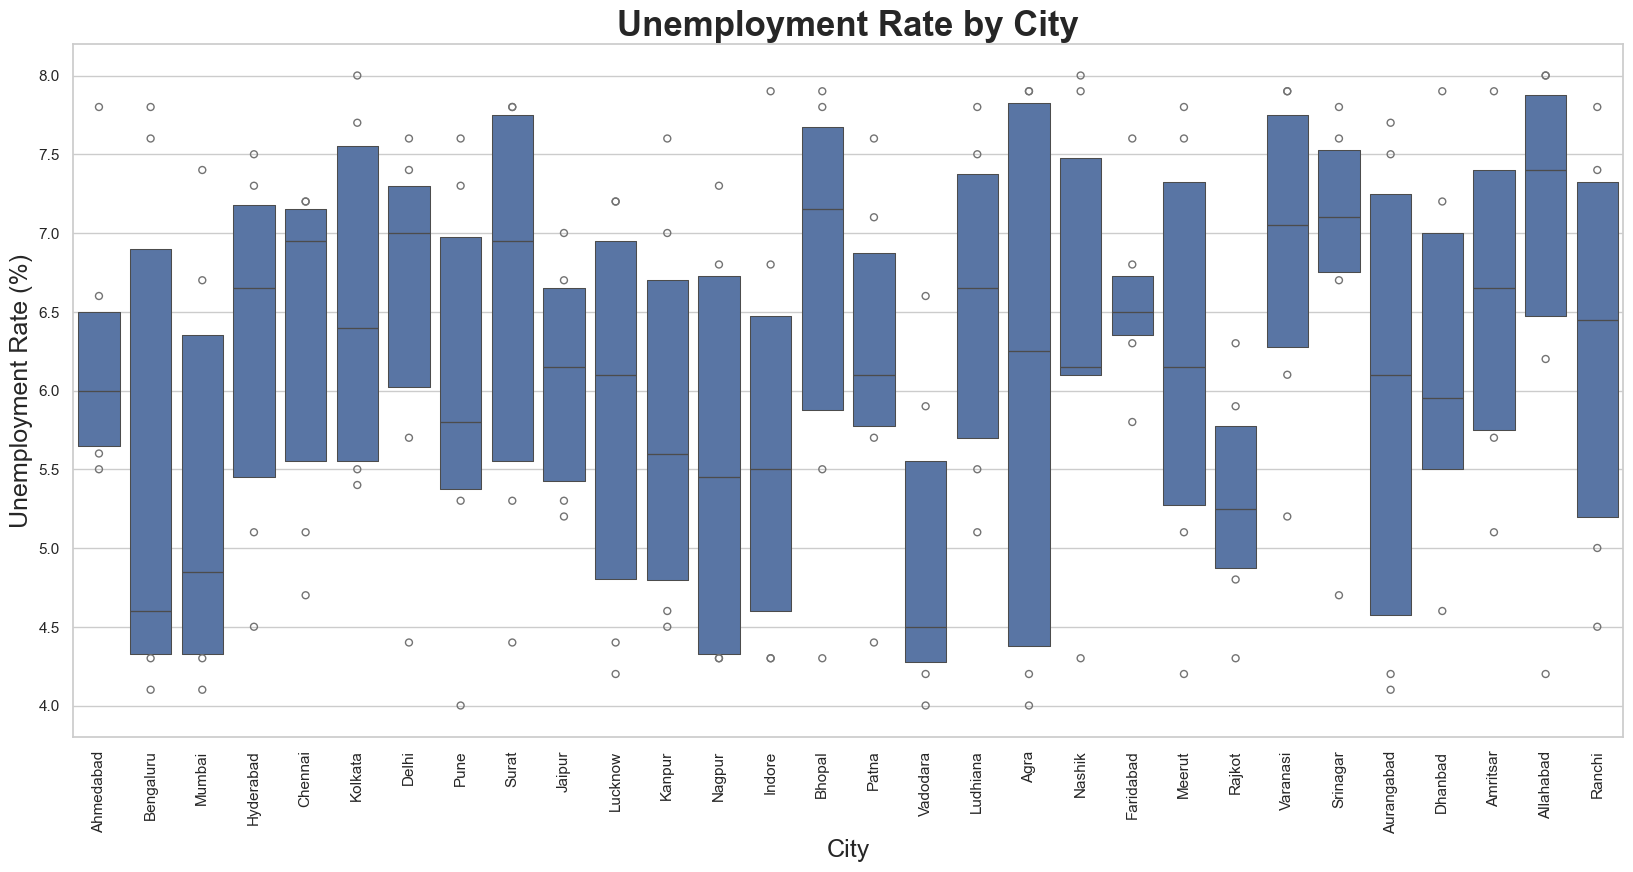

In [18]:
plt.figure(figsize=(20, 9))
sns.boxenplot(data = data, x = 'City', y = 'Unemployment Rate (%)')
plt.title('Unemployment Rate by City', fontweight='bold', fontsize = 25)
plt.xlabel("City", fontsize = 18)
plt.ylabel('Unemployment Rate (%)', fontsize =18)
plt.xticks(rotation = 90)
plt.show()


# Comparing Youth Unemployment Rate across Cities

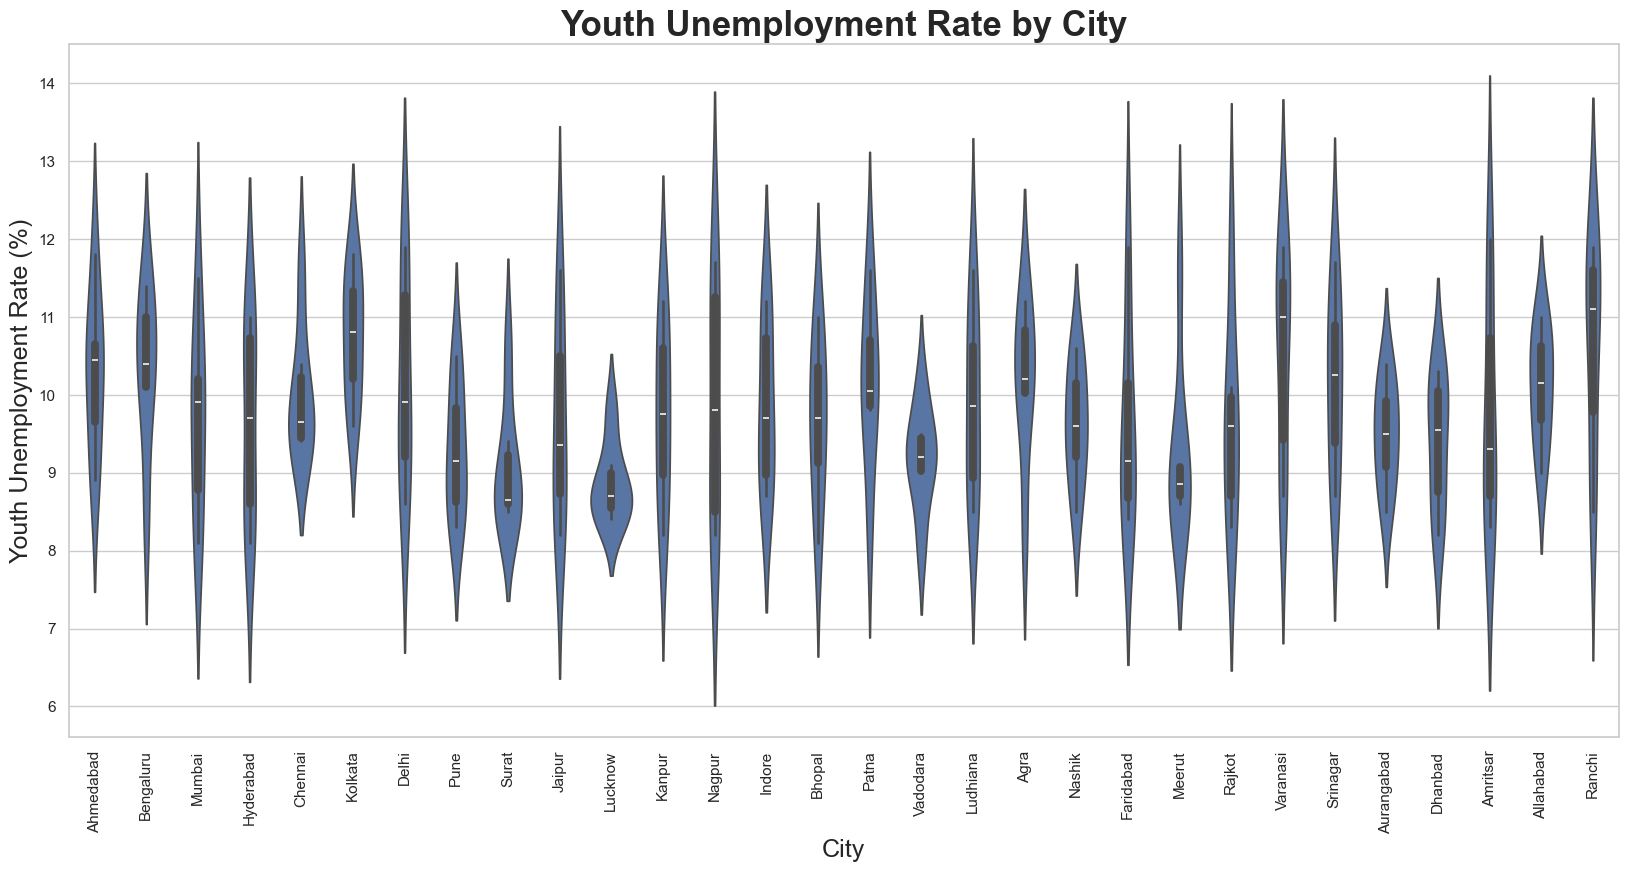

In [19]:
plt.figure(figsize=(20, 9))
sns.violinplot(data = data, x = 'City', y = 'Youth Unemployment Rate (%)')
plt.title('Youth Unemployment Rate by City', fontweight='bold', fontsize = 25)
plt.xlabel("City", fontsize = 18)
plt.ylabel('Youth Unemployment Rate (%)', fontsize =18)
plt.xticks(rotation = 90)
plt.show()

# Relationship between R&D Expenditure and Patents

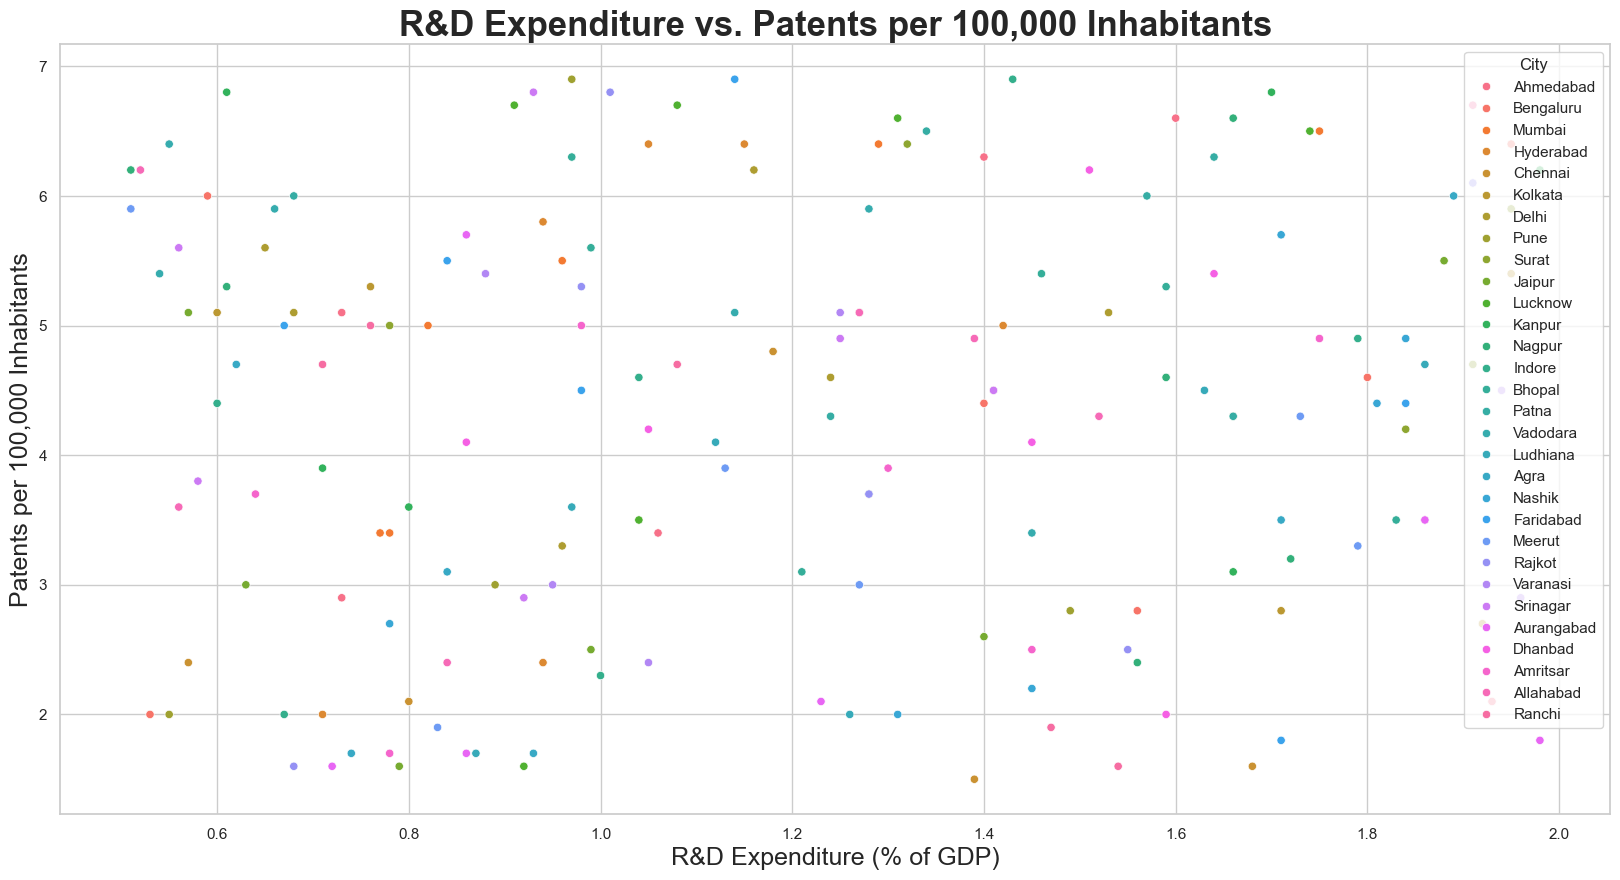

In [20]:
plt.figure(figsize=(20, 10))
sns.scatterplot(data = data, x = 'R&D Expenditure (% of GDP)', y = 'Patents per 100,000 Inhabitants', hue = 'City')
plt.title('R&D Expenditure vs. Patents per 100,000 Inhabitants',fontweight='bold', fontsize = 25)
plt.xlabel('R&D Expenditure (% of GDP)', fontsize = 18)
plt.ylabel('Patents per 100,000 Inhabitants', fontsize = 18)
plt.show()


# Distribution of SME Employment across Cities

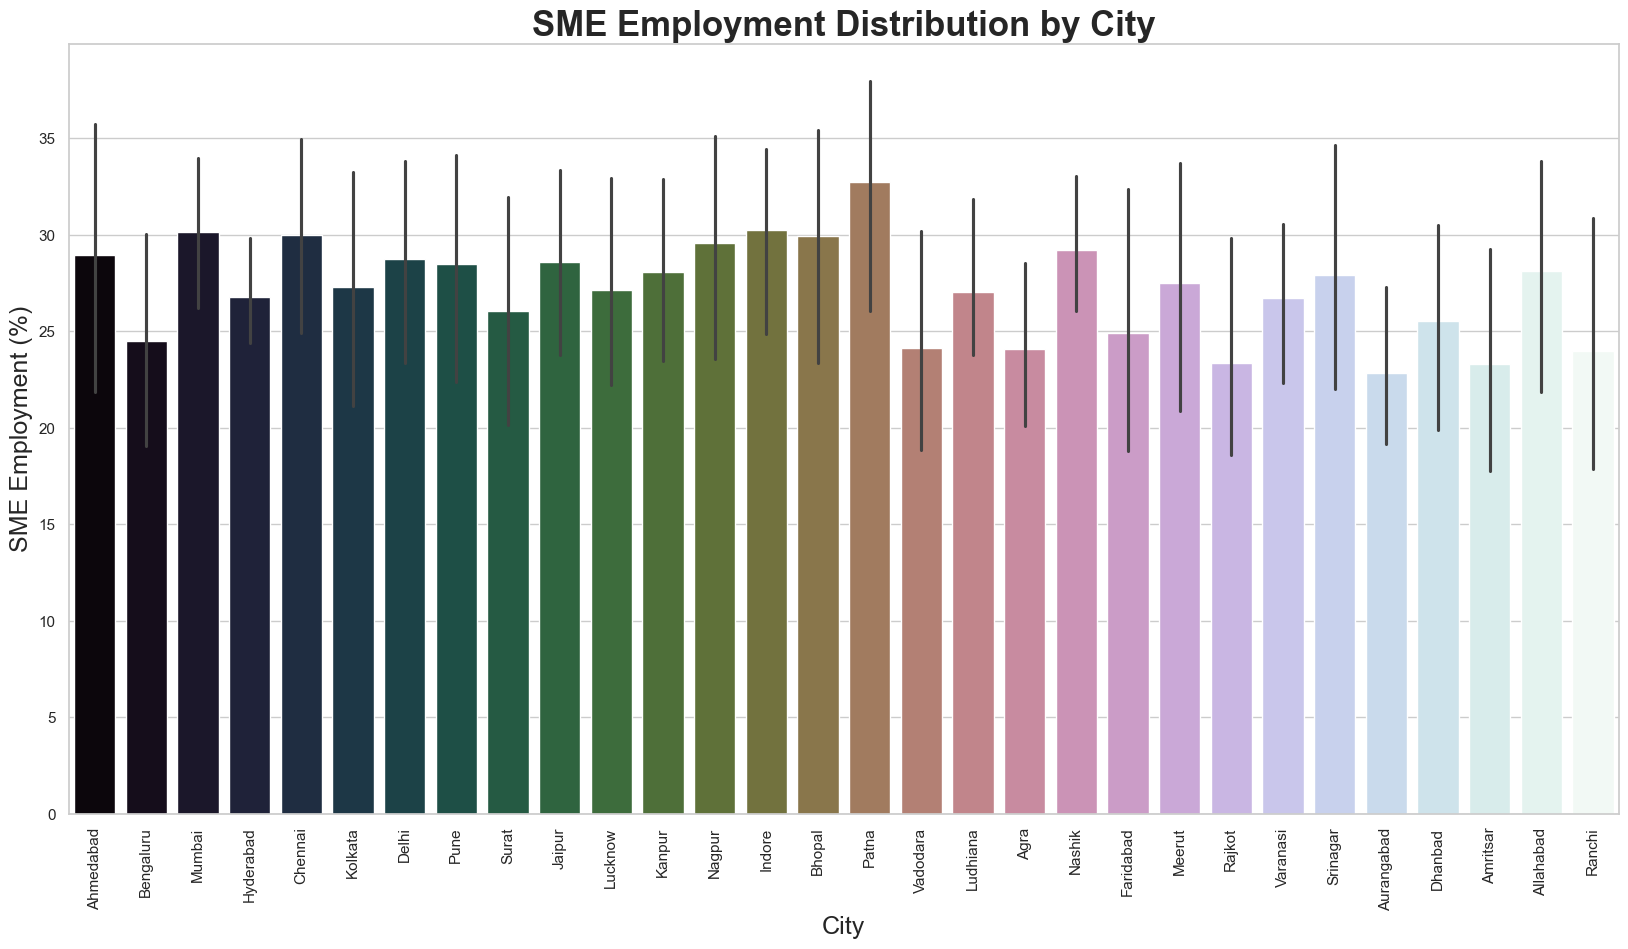

In [21]:
plt.figure(figsize=(20, 10))
sns.barplot(data = data, x = 'City', y = 'SME Employment (%)', palette = 'cubehelix')
plt.title('SME Employment Distribution by City',fontweight='bold', fontsize = 25)
plt.xlabel("City", fontsize = 18)
plt.ylabel('SME Employment (%)', fontsize = 18)
plt.xticks(rotation = 90)
plt.show()

#  Distribution of Tourism Sector Employment (%) across Cities

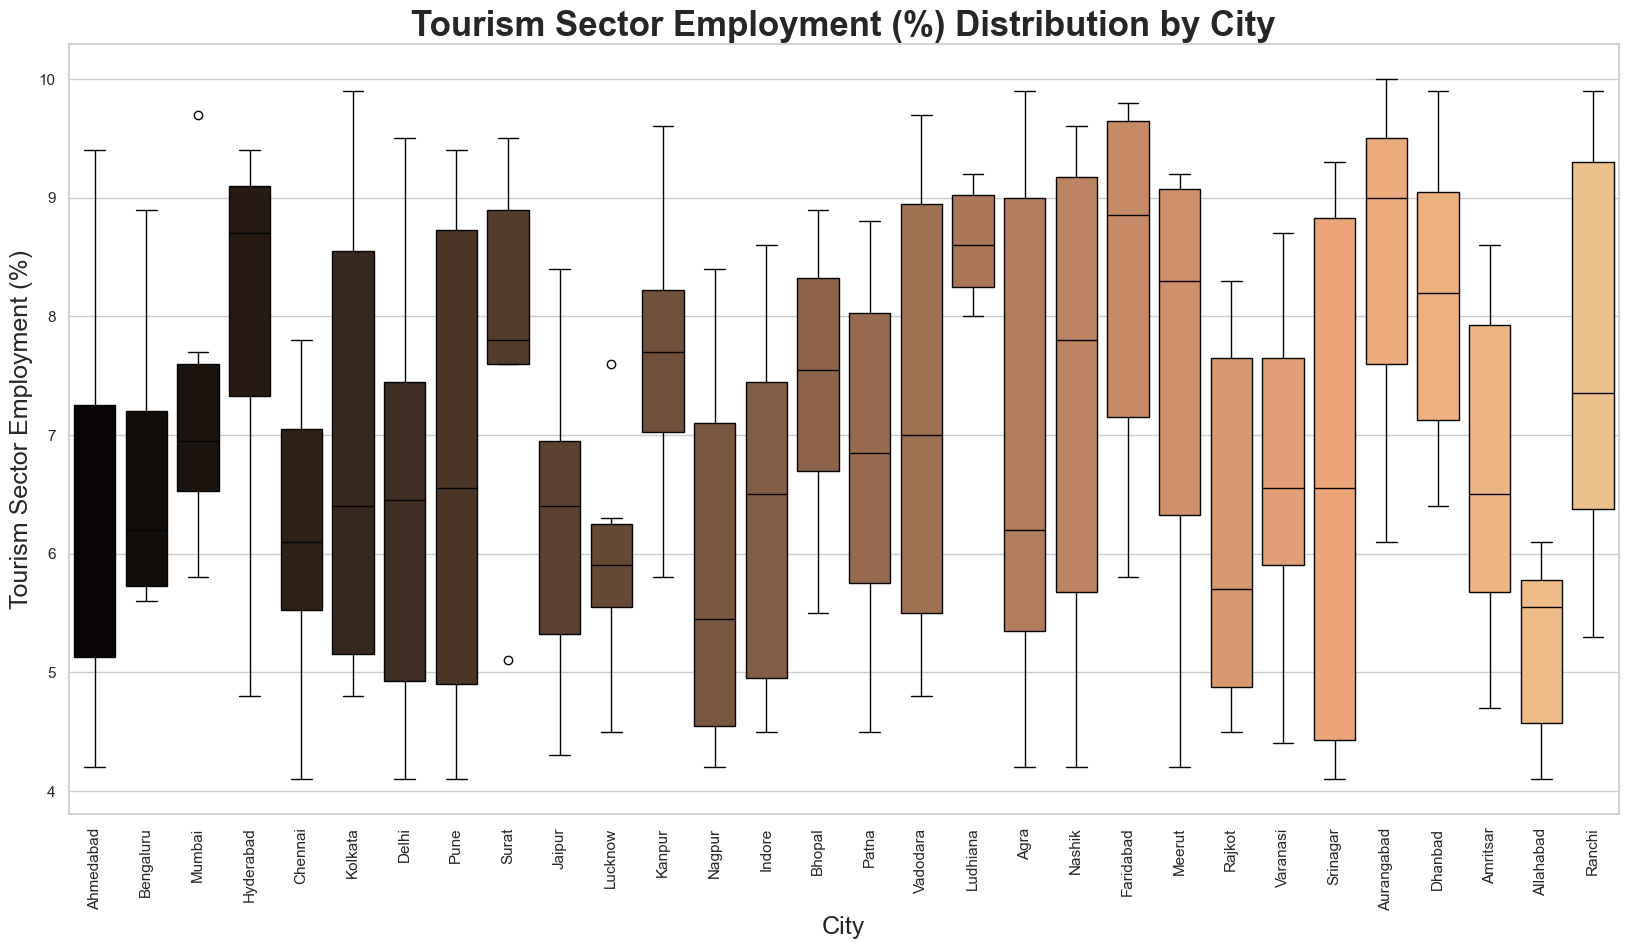

In [22]:

plt.figure(figsize=(20, 10))
sns.boxplot(data = data, x = 'City', y = 'Tourism Sector Employment (%)', palette = 'copper')
plt.title('Tourism Sector Employment (%) Distribution by City',fontweight='bold', fontsize = 25)
plt.xlabel("City", fontsize = 18)
plt.ylabel('Tourism Sector Employment (%)', fontsize = 18)
plt.xticks(rotation = 90)
plt.show()

#  Distribution of ICT Sector Employment (%) across Cities

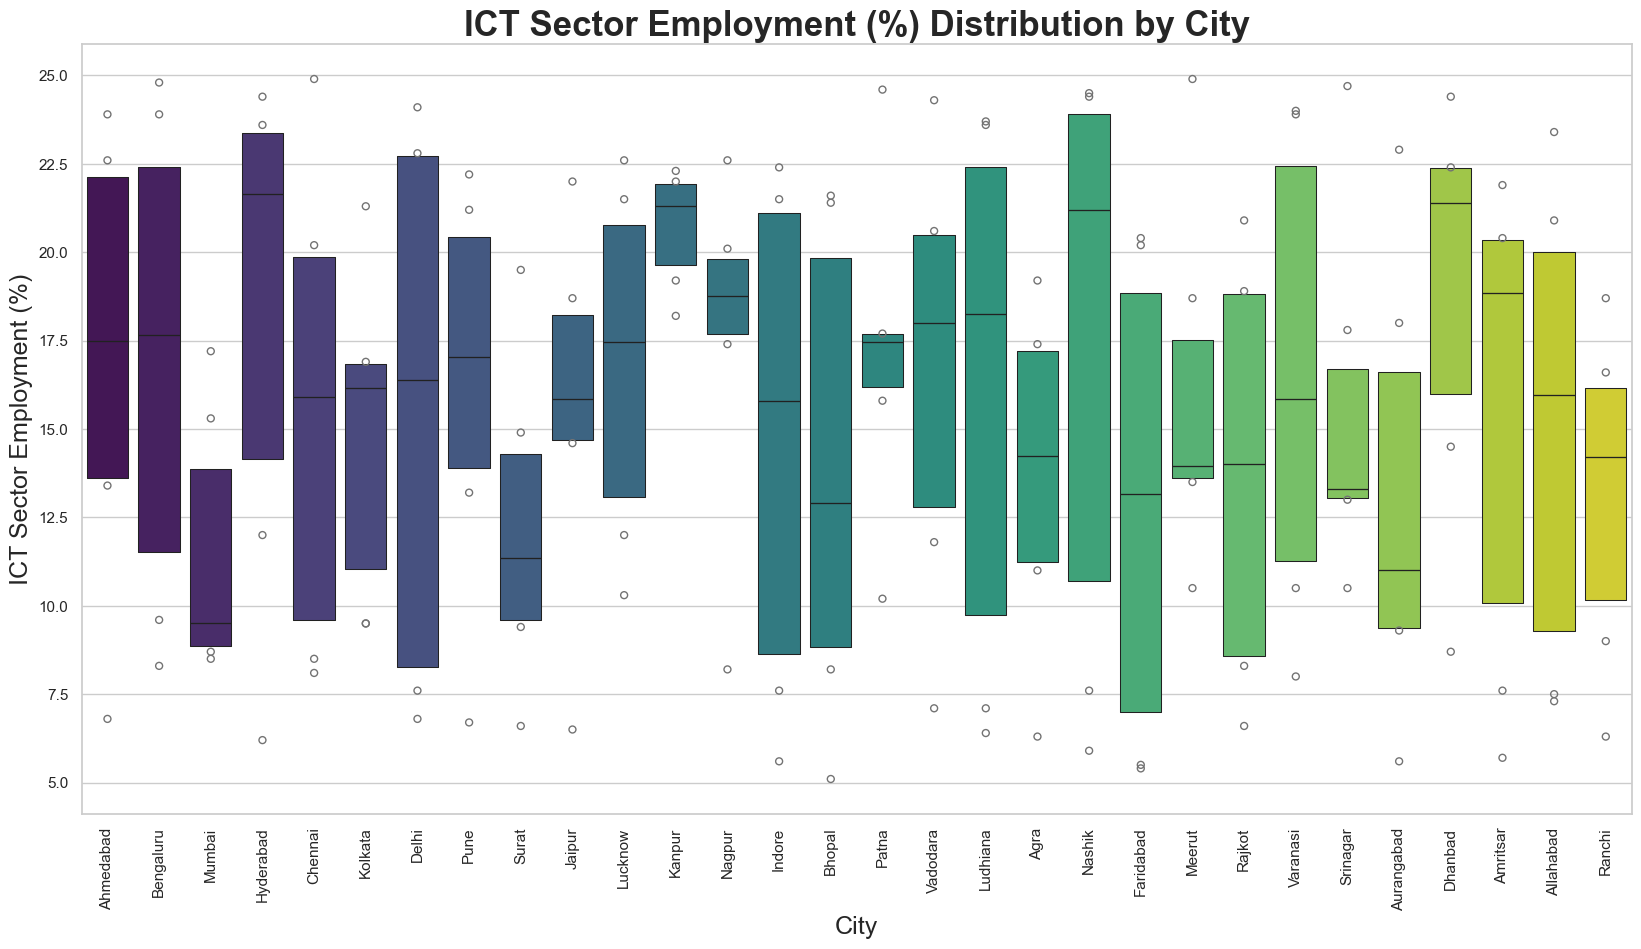

In [23]:

plt.figure(figsize=(20, 10))
sns.boxenplot(data = data, x = 'City', y = 'ICT Sector Employment (%)', palette = 'viridis')
plt.title('ICT Sector Employment (%) Distribution by City',fontweight='bold', fontsize = 25)
plt.xlabel("City", fontsize = 18)
plt.ylabel('ICT Sector Employment (%)', fontsize = 18)
plt.xticks(rotation = 90)
plt.show()

# Pairwise Relationships between Indicators

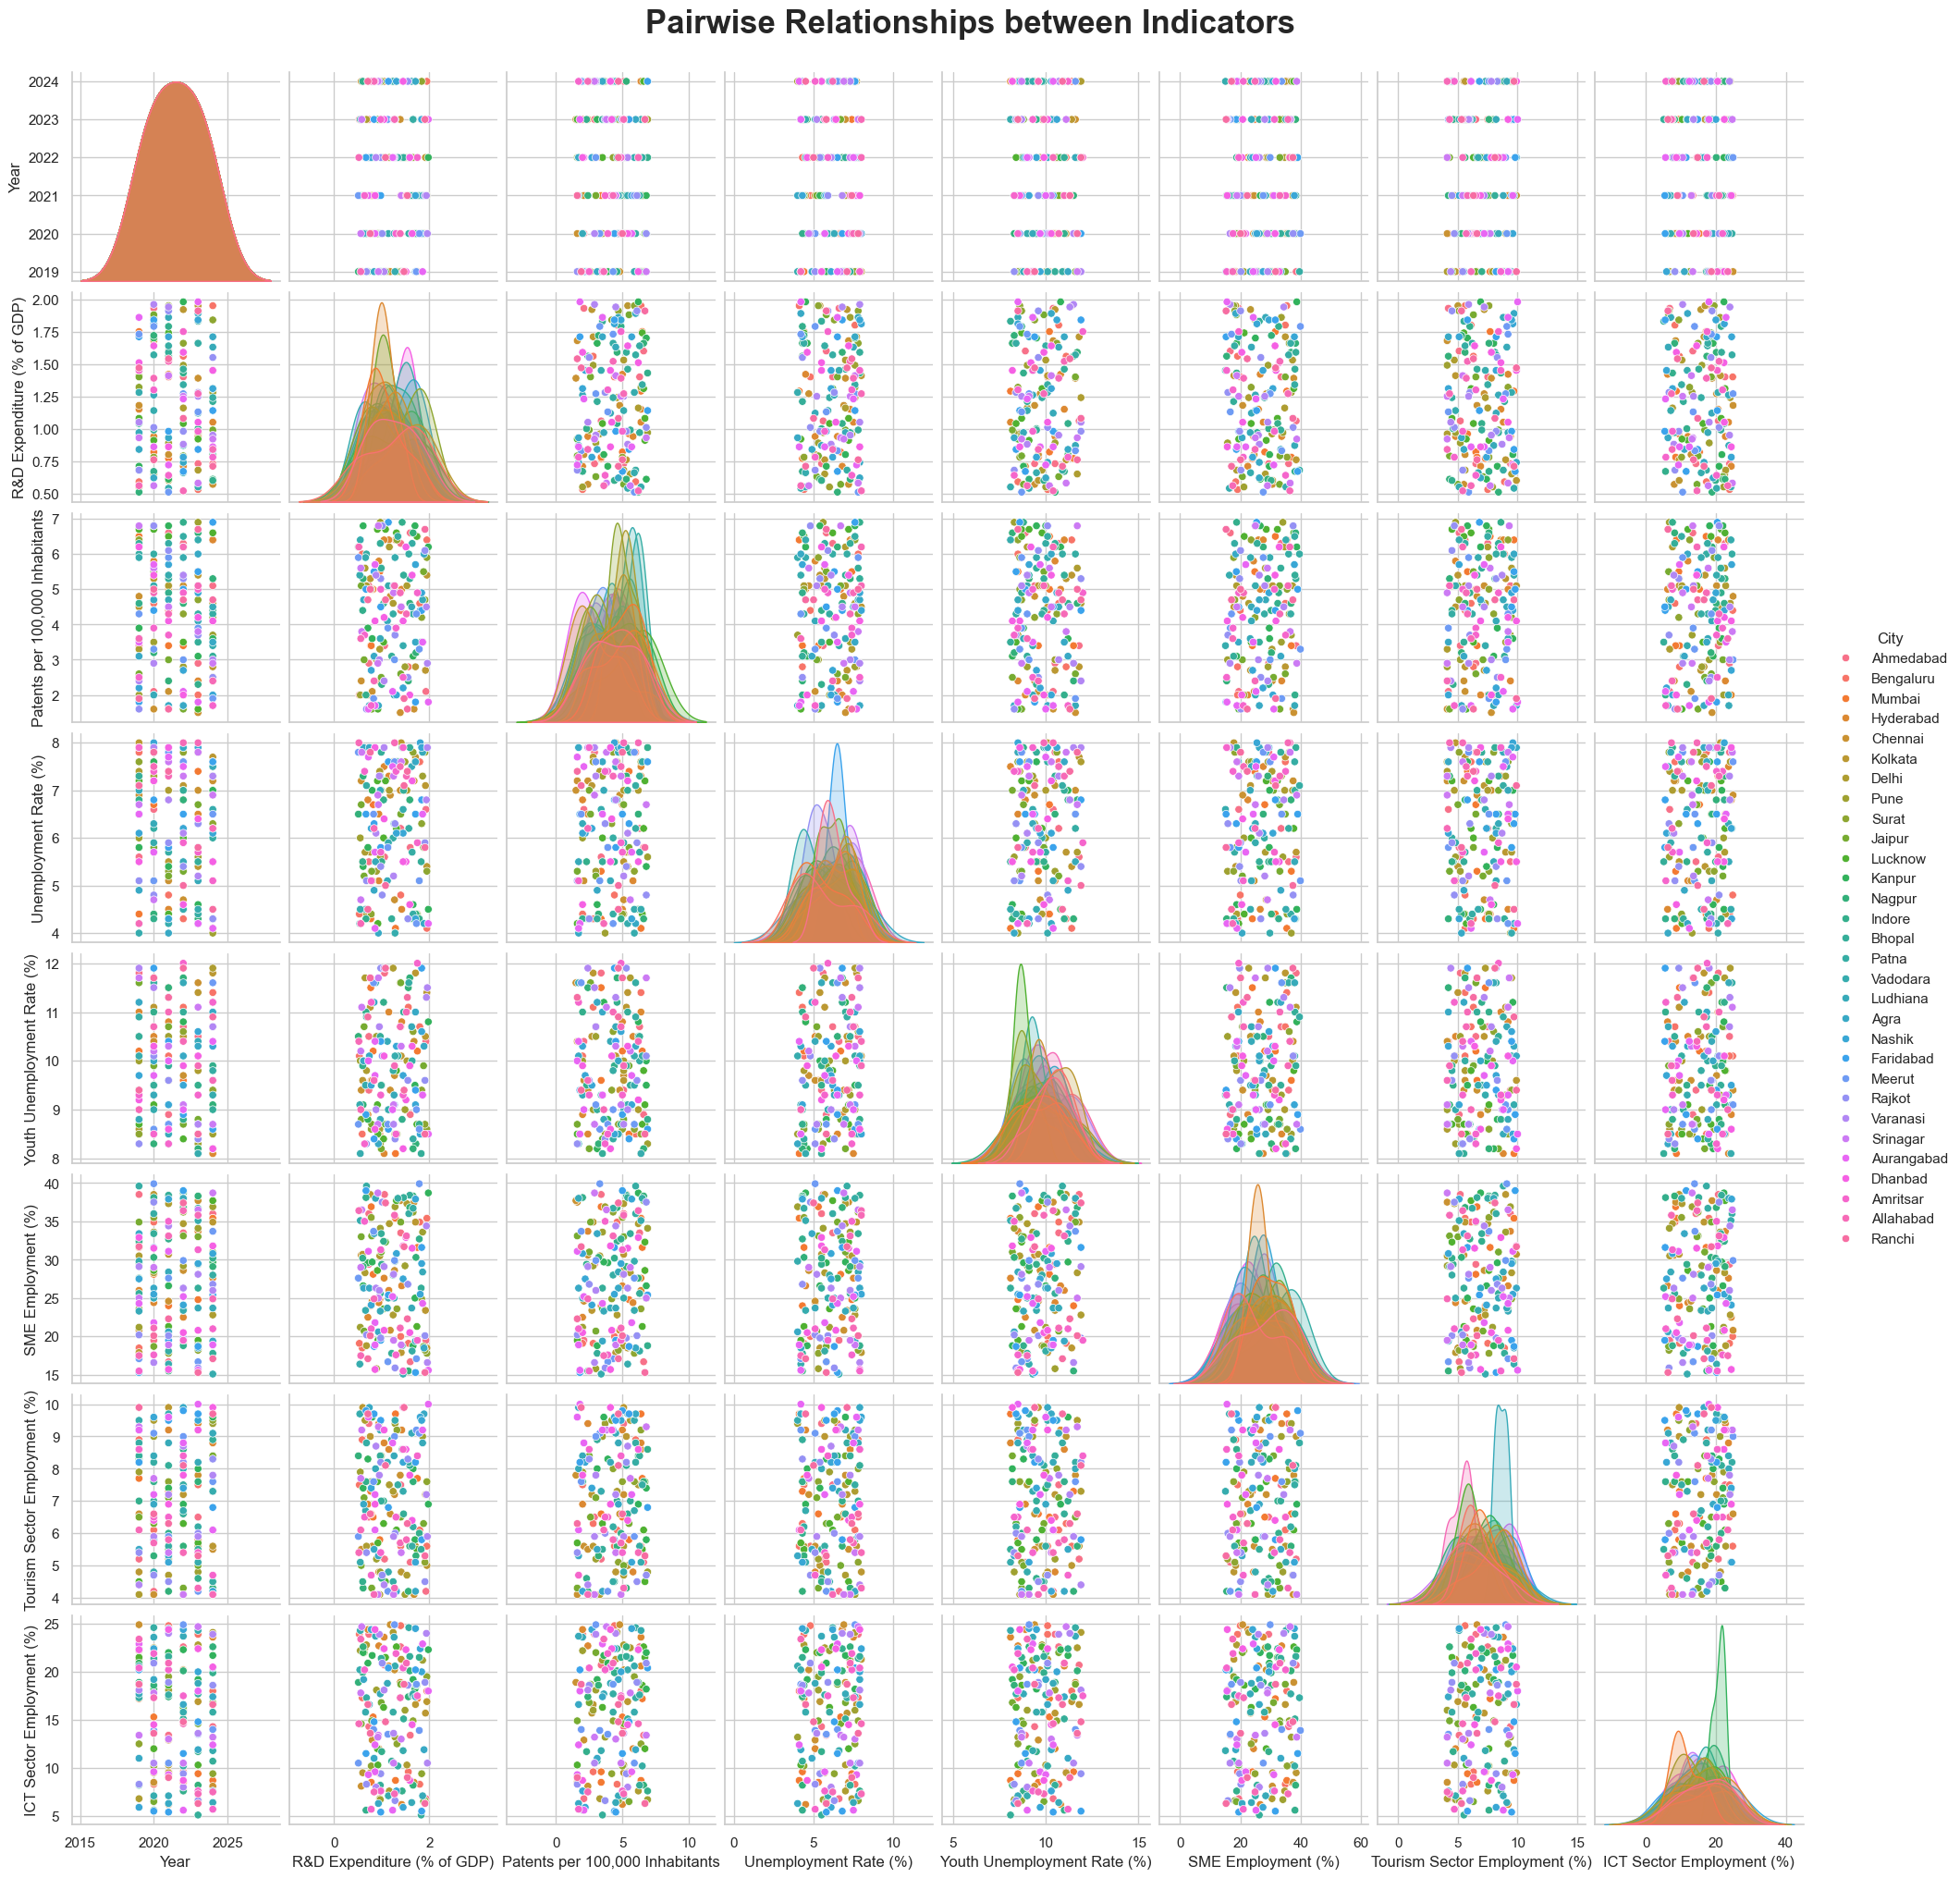

In [24]:
# Pair Plot
sns.pairplot(data, hue='City')
plt.suptitle('Pairwise Relationships between Indicators', y = 1.02, fontsize = 25, fontweight = 'bold')
plt.show()


# Unemployment Rate across Cities over Years

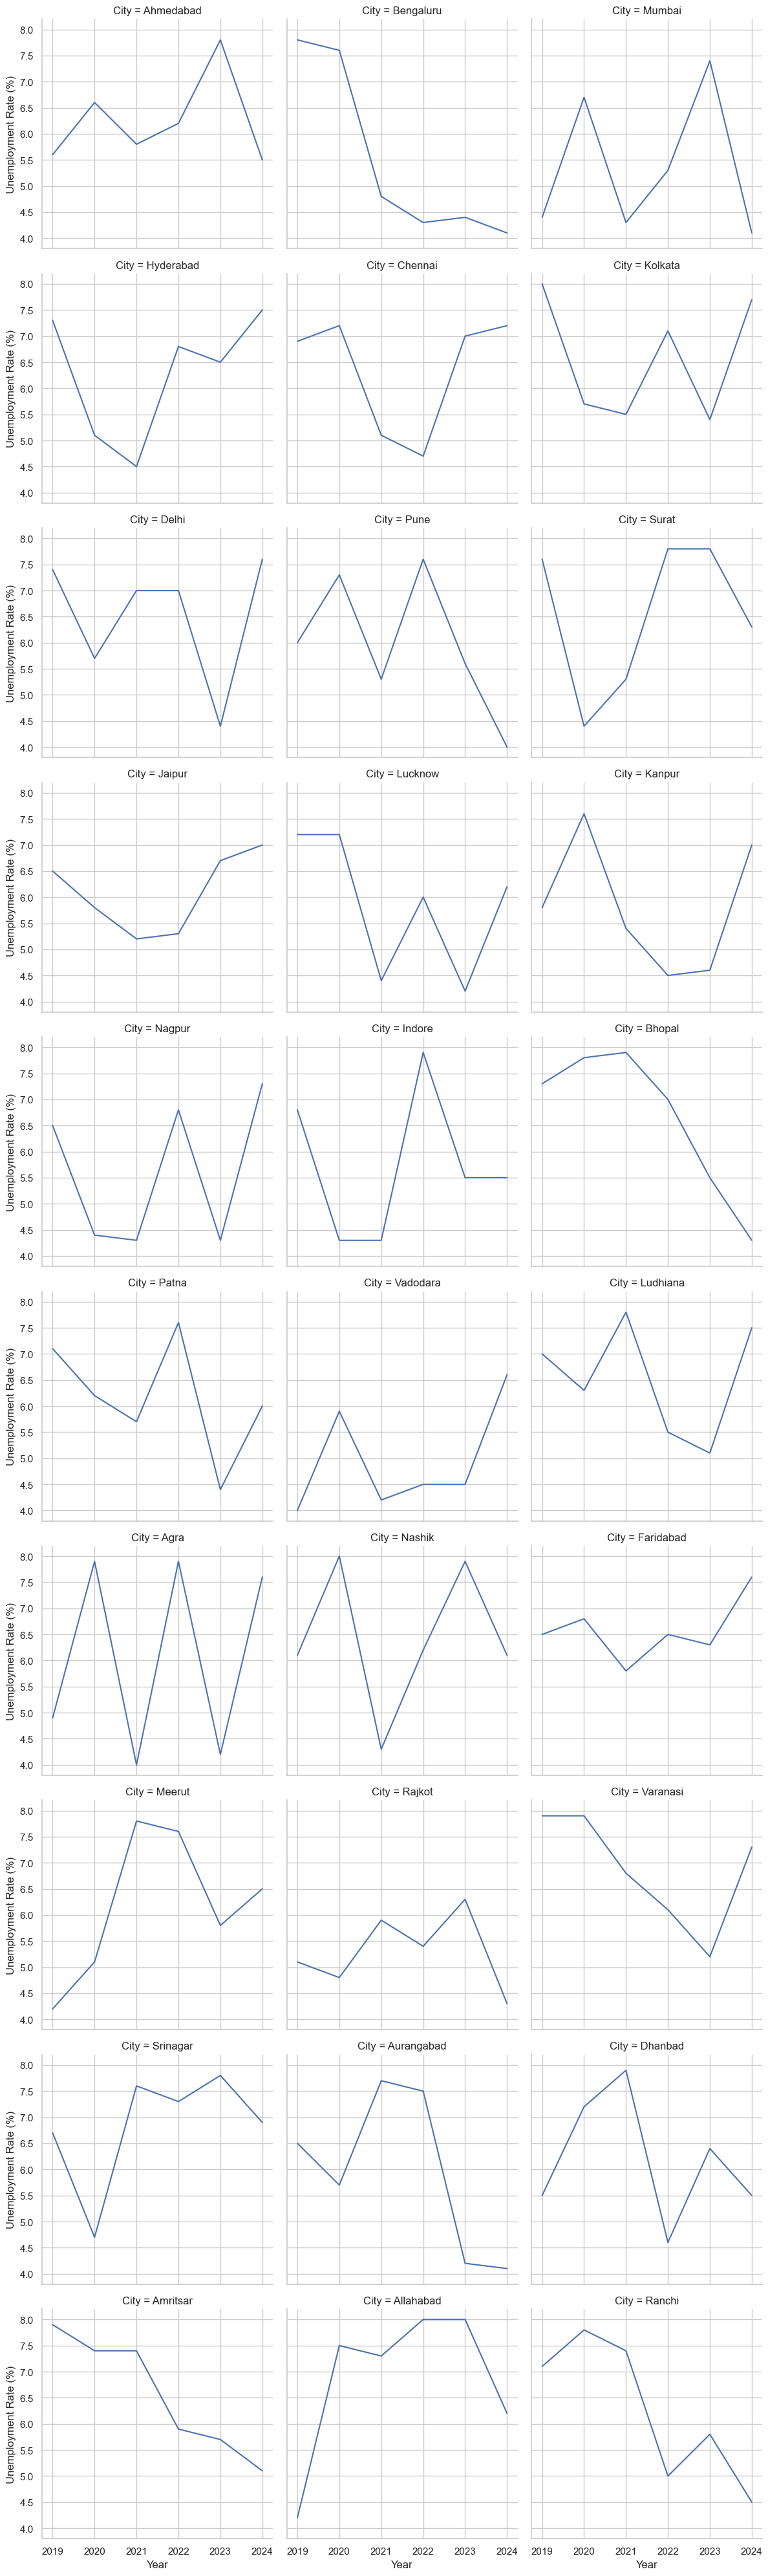

In [25]:
s = sns.FacetGrid(data, col='City', col_wrap=3, height=4)
s.map(sns.lineplot, 'Year', 'Unemployment Rate (%)')
s.add_legend()
plt.show()


# Correlation heatmap

<Axes: title={'center': 'Correlation Matrix of Economic Indicators'}>

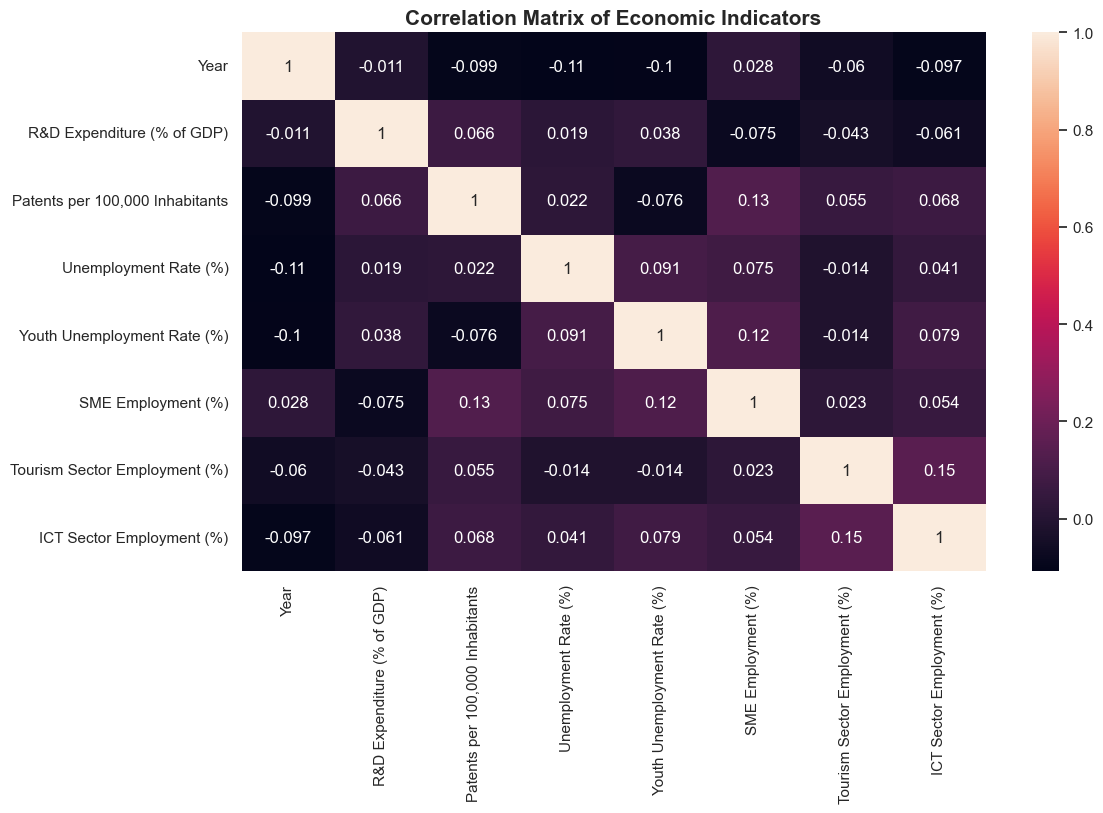

In [26]:
sns.set(rc = {'figure.figsize' : (12,7)})
s = data.select_dtypes(include = "number").corr()
plt.title('Correlation Matrix of Economic Indicators', fontweight = 'bold', fontsize = 15)
sns.heatmap(s, annot = True)

In [27]:
s = data.select_dtypes(include="number").corr()

# Print the correlation matrix
print("Correlation Matrix of Economic Indicators")
print(s)

Correlation Matrix of Economic Indicators
                                     Year  R&D Expenditure (% of GDP)  \
Year                             1.000000                   -0.010924   
R&D Expenditure (% of GDP)      -0.010924                    1.000000   
Patents per 100,000 Inhabitants -0.098504                    0.066246   
Unemployment Rate (%)           -0.108684                    0.019084   
Youth Unemployment Rate (%)     -0.100546                    0.037825   
SME Employment (%)               0.028484                   -0.074897   
Tourism Sector Employment (%)   -0.060383                   -0.043029   
ICT Sector Employment (%)       -0.096547                   -0.061111   

                                 Patents per 100,000 Inhabitants  \
Year                                                   -0.098504   
R&D Expenditure (% of GDP)                              0.066246   
Patents per 100,000 Inhabitants                         1.000000   
Unemployment Rate (%)       

# Analysis of Correlation Matrix

## Overview
The correlation matrix displays the relationships between various economic indicators. A correlation coefficient ranges from -1 to 1, where:
- **1** indicates a perfect positive correlation
- **-1** indicates a perfect negative correlation
- **0** indicates no correlation

## Key Observations

1. **R&D Expenditure and Patents**
   - **Correlation Coefficient: 0.066**
   - **Observation:** A weak positive correlation between R&D expenditure (% of GDP) and the number of patents per 100,000 inhabitants. This suggests that higher R&D spending is only slightly associated with an increase in patents.

2. **Unemployment Rate and Youth Unemployment Rate**
   - **Correlation Coefficient: 0.091**
   - **Observation:** A weak positive correlation exists between the overall unemployment rate and the youth unemployment rate, indicating that as general unemployment increases, youth unemployment may also increase, albeit slightly.

3. **SME Employment and Patents**
   - **Correlation Coefficient: 0.125**
   - **Observation:** A weak positive correlation between SME employment and patents per 100,000 inhabitants. This could imply that regions with more SME employment might have slightly more patents, although the relationship is not very strong.

4. **Tourism Sector Employment and ICT Sector Employment**
   - **Correlation Coefficient: 0.147**
   - **Observation:** A weak positive correlation between employment in the tourism sector and the ICT sector. This suggests a small association between these two sectors, indicating that regions with more tourism employment may also have slightly higher ICT sector employment.

5. **Unemployment Rate and SME Employment**
   - **Correlation Coefficient: 0.075**
   - **Observation:** A weak positive correlation between the unemployment rate and SME employment, suggesting a minor association where higher unemployment might be linked with slightly higher SME employment.

6. **ICT Sector Employment and Youth Unemployment Rate**
   - **Correlation Coefficient: 0.079**
   - **Observation:** A weak positive correlation between ICT sector employment and the youth unemployment rate, indicating a minor relationship where higher ICT sector employment may be slightly related to higher youth unemployment.

7. **General Observations**
   - No strong correlations (positive or negative) between most indicators. 
   - Many variables exhibit weak correlations, implying that other factors may play a more significant role in these economic indicators.

## Summary
- **Significant correlations** are generally weak among the variables studied.
- **Patents**, **R&D expenditure**, and **SME employment** show minor correlations with other variables but none are strong enough to indicate a substantial relationship.
- **Sector employment** in tourism and ICT displays slight positive correlations, suggesting that sectors may have modest interdependencies.
